# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [ ]:
# from IPython.core.magic import record_magic
# from mypy.semanal import names_modified_by_assignment
# from prompt_toolkit.key_binding.bindings.named_commands import end_of_file
# from statsmodels.graphics.tukeyplot import results
#
# print("Hello World!")


In [1]:
# import kagglehub
#
# # Download latest version
# path = kagglehub.dataset_download("f4k25g/nfl-salaries")
#
# print("Path to dataset files:", path)

In [1]:
import pandas as pd
import numpy as np
df_nfl_salaries = pd.read_csv(r'C:\Users\efrui\.cache\kagglehub\datasets\f4k25g\nfl-salaries\versions\1\2014-thru-2020-cap-tables.csv')

# https://www.kaggle.com/datasets/f4k25g/nfl-salaries


In [2]:
print(df_nfl_salaries)

                 name  pos   cap_hit  cap_percent  season  \
0      Russell Wilson   QB  31000000        15.53    2020   
1       Aaron Rodgers   QB  29672000        15.06    2019   
2        Kirk Cousins   QB  29000000        15.12    2019   
3          Jared Goff   QB  28842682        14.15    2020   
4         Khalil Mack  OLB  26600000        12.52    2020   
...               ...  ...       ...          ...     ...   
12129  Marcus Sherels   CB         0         0.00    2019   
12130  Deone Bucannon  ILB         0         0.00    2020   
12131    Earl Watford    G         0         0.00    2020   
12132   Tyrunn Walker   DT         0         0.00    2018   
12133        Ben Tate   RB         0         0.00    2014   

                       team  
0          seattle-seahawks  
1         green-bay-packers  
2         minnesota-vikings  
3          los-angeles-rams  
4             chicago-bears  
...                     ...  
12129        miami-dolphins  
12130  tampa-bay-buccaneers

In [3]:
team_name_mapping_salary = {
'oakland-raiders':  'las-vegas-raiders'
,'san-diego-chargers':  'los-angeles-chargers'
,'st.-louis-rams':  'los-angeles-rams'
,'washington-redskins':  'washington-commanders'
,'washington-football-team':    'washington-commanders'
}

In [4]:
# Mapping team names to most recent team name in order to be able to compare historical data with most recent data (in graphs, etc.)

df_nfl_salaries['team']=df_nfl_salaries['team'].replace(team_name_mapping_salary)

In [5]:
df_nfl_salaries['team'].unique()

array(['seattle-seahawks', 'green-bay-packers', 'minnesota-vikings',
       'los-angeles-rams', 'chicago-bears', 'detroit-lions',
       'denver-broncos', 'tampa-bay-buccaneers', 'indianapolis-colts',
       'las-vegas-raiders', 'baltimore-ravens', 'new-york-giants',
       'new-orleans-saints', 'pittsburgh-steelers',
       'washington-commanders', 'atlanta-falcons', 'los-angeles-chargers',
       'tennessee-titans', 'kansas-city-chiefs', 'new-england-patriots',
       'carolina-panthers', 'dallas-cowboys', 'san-francisco-49ers',
       'buffalo-bills', 'miami-dolphins', 'philadelphia-eagles',
       'arizona-cardinals', 'cincinnati-bengals', 'new-york-jets',
       'houston-texans', 'jacksonville-jaguars', 'cleveland-browns'],
      dtype=object)

group by team and year, calculate gini coefficient


In [6]:

#define function to calculate Gini coefficient
def gini_calculation(x):
    """
    Calculate the Gini coefficient of a numpy array.
    Based on the bottom equation from:
    http://www.statsdirect.com/help/content/image/stat0206_wmf.gif
    from:
    http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
    """
    # Force array dtype to double precision for calculations
    x = np.array(x, dtype=np.double)
    # Flatten the array and sort the values in ascending order
    x = np.sort(x.flatten())
    if x.size == 0:
        return 0
    # The Gini coefficient is undefined if the sum is zero
    if np.sum(x) == 0:
      return 0

    n = x.size
    # Calculate the Gini coefficient using the simplified formula for sorted positive values
    # G = (sum(i * xi) for i in 1 to n) / (n * sum(xi)) - (n+1) / (2n)
    # A more common and direct formula:
    # G = (2 * sum(i * xi) - (n + 1) * sum(xi)) / (n * sum(xi))
    # Or, using a mean absolute difference approach:
    # G = 0.5 * rmad (relative mean absolute difference)

    # Efficient numpy implementation:
    index = np.arange(1, n + 1)
    return (2 * np.sum(index * x) - (n + 1) * np.sum(x)) / (n * np.sum(x))

In [7]:
df_bears = df_nfl_salaries[df_nfl_salaries['team']=='chicago-bears']

In [8]:
print(df_bears)

                 name  pos   cap_hit  cap_percent  season           team
4         Khalil Mack  OLB  26600000        12.52    2020  chicago-bears
80         Jay Cutler   QB  18500000        13.91    2014  chicago-bears
91        Kyle Fuller   CB  18000000         9.24    2019  chicago-bears
125        Jay Cutler   QB  16500000        11.37    2015  chicago-bears
133    Allen Robinson   WR  16000000         8.21    2019  chicago-bears
...               ...  ...       ...          ...     ...            ...
11847  DeVante Bausby   CB     51176         0.04    2015  chicago-bears
11906    Greg Scruggs   DE     38823         0.03    2015  chicago-bears
11962     Austen Lane   DE     33529         0.03    2014  chicago-bears
11983    Josh Shirley  OLB     30882         0.02    2016  chicago-bears
12094  Terry Williams   DT     25588         0.02    2015  chicago-bears

[383 rows x 6 columns]


In [9]:
print(df_bears[df_bears['season']==2020])

                         name  pos   cap_hit  cap_percent  season  \
4                 Khalil Mack  OLB  26600000        12.52    2020   
178            Allen Robinson   WR  15000000         7.06    2020   
341               Akiem Hicks   DT  11800000         5.55    2020   
363               Kyle Fuller   CB  11500000         5.41    2020   
482              Charles Leno   LT  10294000         4.84    2020   
597         Mitchell Trubisky   QB   9327591         4.39    2020   
1103               Nick Foles   QB   6666666         3.14    2020   
1241             Robert Quinn  OLB   6100000         2.87    2020   
1252            Buster Skrine   CB   6037500         2.84    2020   
1267             Jimmy Graham   TE   6000000         2.82    2020   
1360    Cordarrelle Patterson   WR   5750000         2.71    2020   
1530             Roquan Smith  ILB   5129227         2.41    2020   
1899           Cody Whitehair    C   4200000         1.98    2020   
1913          Danny Trevathan  ILB

In [10]:
gini_calculation(df_bears['cap_percent'])

np.float64(0.632400751864922)

In [11]:
# Team Stats

# Download latest version
# path = kagglehub.dataset_download("nickcantalupa/nfl-team-data-2003-2023")
#
# print("Path to dataset files:", path)


# https://www.kaggle.com/datasets/nickcantalupa/nfl-team-data-2003-2023


# About Dataset
#
# Context
#
# I was interested in analyzing how NFL offenses have evolved over the modern era. I used www.pro-football-reference.com to find the data that I was interested in analyzing. I used Python BeautifulSoup4 and a selenium Webdriver to pull the html data from the website and load it into a DataFrame for analysis.
#
# Content
#
# There is currently data on 672 Teams across 21 seasons. The stats included are regarding team record, passing, rushing, penalties, turnovers, and more. The file team_stats_2003_2023.csv contains 35 variables outlined below.
#



In [11]:
df_team_stats = pd.read_csv(r'C:\Users\efrui\.cache\kagglehub\datasets\nickcantalupa\nfl-team-data-2003-2023\versions\1\team_stats_2003_2023.csv')

In [12]:
print(df_team_stats)
df_team_stats_2020 = df_team_stats[df_team_stats['year']<2021]
# print(df_team_stats_2020)

     year                  team  wins  losses  win_loss_perc  points  \
0    2003  New England Patriots    14       2          0.875     348   
1    2003        Miami Dolphins    10       6          0.625     311   
2    2003         Buffalo Bills     6      10          0.375     243   
3    2003         New York Jets     6      10          0.375     283   
4    2003      Baltimore Ravens    10       6          0.625     391   
..    ...                   ...   ...     ...            ...     ...   
667  2023     Carolina Panthers     2      15          0.118     236   
668  2023   San Francisco 49ers    12       5          0.706     491   
669  2023      Los Angeles Rams    10       7          0.588     404   
670  2023      Seattle Seahawks     9       8          0.529     364   
671  2023     Arizona Cardinals     4      13          0.235     330   

     points_opp  points_diff   mov   g  ...  rush_td  rush_yds_per_att  \
0           238          110   6.9  16  ...        9         

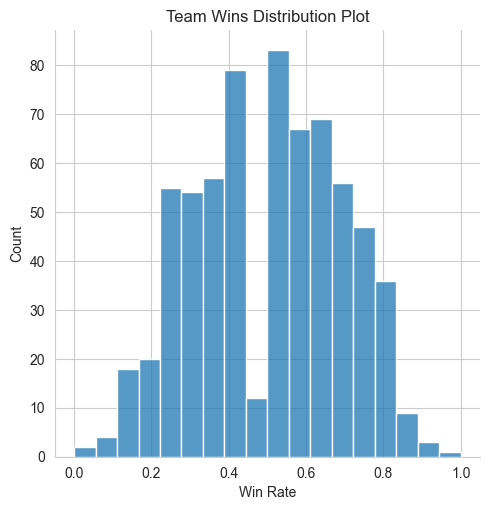

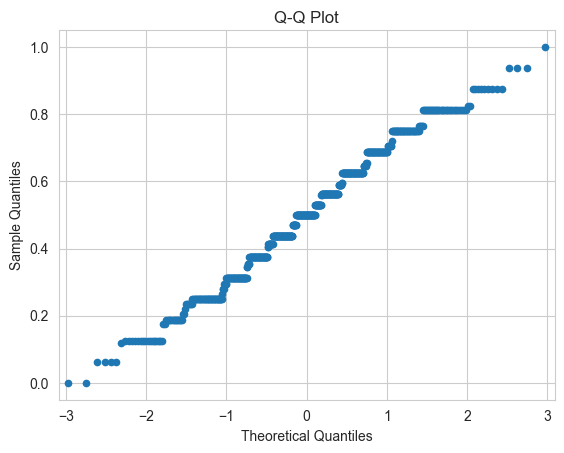

In [13]:
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np


sns_plot1 = sns.displot(df_team_stats['win_loss_perc'])
plt.title('Team Wins Distribution Plot')
plt.xlabel("Win Rate")
sns_plot1.savefig("Win_Loss_Perc_Displot.png",dpi=300)

sns_plot2=sm.qqplot(df_team_stats['win_loss_perc'],markersize=4.5)
plt.title('Q-Q Plot')
# sns_plot2.figure.set_size_inches(4,3)
sns_plot2.savefig("Win_Loss_Perc_QQPlot.png",dpi=300)

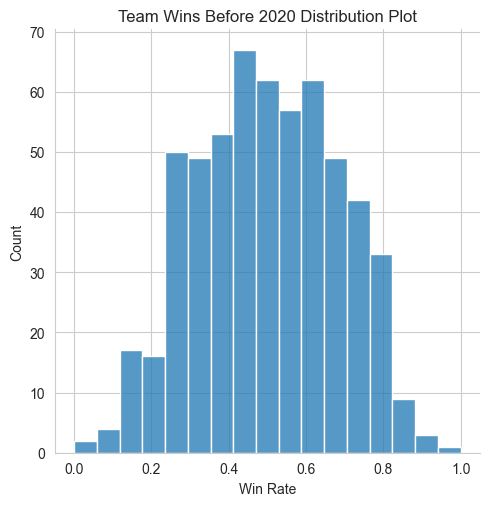

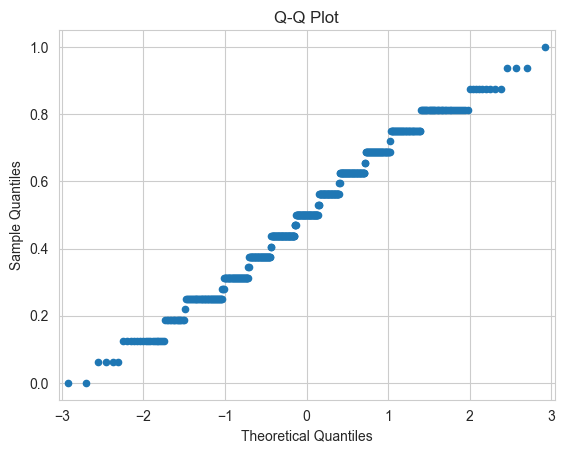

In [14]:
# Data up to and before 2020, when NFL switched to 17 game season

sns_plot1=sns.displot(df_team_stats_2020['win_loss_perc'])
plt.title('Team Wins Before 2020 Distribution Plot')
plt.xlabel("Win Rate")
sns_plot1.savefig("Win_Loss_Perc_Displot_Bfr2020.png",dpi=300)

sns_plot2=sm.qqplot(df_team_stats_2020['win_loss_perc'],markersize=4.5)
plt.title('Q-Q Plot')
sns_plot2.savefig("Win_Loss_Perc_QQPlot_Bfr2020.png",dpi=300)

In [15]:
print(df_team_stats.isna().sum())
print(df_nfl_salaries.isna().sum())

year                      0
team                      0
wins                      0
losses                    0
win_loss_perc             0
points                    0
points_opp                0
points_diff               0
mov                     320
g                         0
total_yards               0
plays_offense             0
yds_per_play_offense      0
turnovers                 0
fumbles_lost              0
first_down                0
pass_cmp                  0
pass_att                  0
pass_yds                  0
pass_td                   0
pass_int                  0
pass_net_yds_per_att      0
pass_fd                   0
rush_att                  0
rush_yds                  0
rush_td                   0
rush_yds_per_att          0
rush_fd                   0
penalties                 0
penalties_yds             0
pen_fd                    0
score_pct                 0
turnover_pct              0
exp_pts_tot               0
ties                    352
dtype: int64
name   

In [16]:
import scipy.stats as stats

shapiro_result = stats.shapiro(df_team_stats['win_loss_perc'])
normaltest_result = stats.normaltest(df_team_stats['win_loss_perc'])
anderson_result = stats.anderson(df_team_stats['win_loss_perc'],dist = 'norm')

# shapiro_result = stats.shapiro(df_team_stats_2020['win_loss_perc'])
# normaltest_result = stats.normaltest(df_team_stats_2020['win_loss_perc'])
# anderson_result = stats.anderson(df_team_stats_2020['win_loss_perc'],dist = 'norm')


In [17]:
shapiro_result

# Interpreting the Result
# The function returns two values: the test statistic and the p-value
#
# Test Statistic: This value is between 0 and 1. A value closer to 1 indicates that the data is more likely to be normally distributed.
# P-value: This value is used to determine whether to reject the null hypothesis.
#
# The standard significance level (alpha, \(\alpha \)) for this test is typically 0.05.
#
# If the p-value > 0.05: You fail to reject the null hypothesis; the data is consistent with a normal distribution.If the p-value ≤ 0.05: You reject the null hypothesis; the data is likely not from a normal distribution

# The algorithm used is described in [4] but censoring parameters as described are not implemented. For N > 5000 the W test statistic is accurate, but the p-value may not be.


ShapiroResult(statistic=np.float64(0.9852994951830533), pvalue=np.float64(2.7655745672113733e-06))

In [18]:
normaltest_result

#  NULL hypothesis that data is normally distributed

NormaltestResult(statistic=np.float64(27.593533887113892), pvalue=np.float64(1.0189203786207497e-06))

In [19]:
anderson_result

#  NULL hypothesis that data is from specified (normal) distribution


AndersonResult(statistic=np.float64(3.0850544161621656), critical_values=array([0.56 , 0.63 , 0.751, 0.872, 1.034]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(0.5002455357142856), scale=np.float64(0.19145175422969135))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

<span style="color: black;font-size:24px">
Graphs show a normal distribution, but test results determine data is not normally distributed (regardless of whether 2020 and later data is included or not).  Win-loss percentages are stepped due to number of games in a season.  Shapiro-Wilk test statistic close to 1 (for pre-2020 data and for all data), which indicates data more likely to be from a normal distribution.  I conclude the distribution is similar to a normal distribution, but not a proper normal distribution. Will proceed with regression.
</span>

In [20]:
gini_calculation(df_nfl_salaries['cap_percent'])

np.float64(0.622448546695751)

In [21]:
gini_calculation(df_bears['cap_percent'])

np.float64(0.632400751864922)

In [22]:
# Test gini calculation function
x = [1000,2000,3000,4000,5000,6000,7000]
gini_calculation(x)

np.float64(0.2857142857142857)

In [23]:
df_nfl_salaries_cap_fields = df_nfl_salaries[['team','season','cap_hit','cap_percent']]

In [24]:
df_gini_team2 = df_nfl_salaries_cap_fields.groupby(['team','season'],as_index=False)[['cap_hit','cap_percent']].sum()
df_gini_team2.columns = ['team','season','cap_hit_sum','cap_percent_sum']
print(df_gini_team2)

                      team  season  cap_hit_sum  cap_percent_sum
0        arizona-cardinals    2014     99264014            73.03
1        arizona-cardinals    2015    121979201            82.12
2        arizona-cardinals    2016    111290277            70.00
3        arizona-cardinals    2017    104474970            60.79
4        arizona-cardinals    2018    107921249            60.36
..                     ...     ...          ...              ...
219  washington-commanders    2016    117003811            72.23
220  washington-commanders    2017    114359646            64.77
221  washington-commanders    2018    102905158            57.55
222  washington-commanders    2019     78588363            40.62
223  washington-commanders    2020    131896856            63.07

[224 rows x 4 columns]


In [25]:
df_gini_team2.dtypes

team                object
season               int64
cap_hit_sum          int64
cap_percent_sum    float64
dtype: object

In [26]:
df_gini_team2['cap_hit_sum']=df_gini_team2['cap_hit_sum']+0.00

In [27]:
# Salary cap maximum by year:
#
# https://www.spotrac.com/nfl/cba
#
# Year, cap maximum:
# 2014, 133000000
# 2015, 143280000
# 2016, 155270000
# 2017, 167000000
# 2018, 177200000
# 2019, 188200000
# 2020, 198200000
#
#
# Need to express cap hit as percentage of maximum


df_gini_team2.loc[df_gini_team2['season']==2014,'cap_hit_sum'] *= (1/133000000)
df_gini_team2.loc[df_gini_team2['season']==2015,'cap_hit_sum'] *= (1/143280000)
df_gini_team2.loc[df_gini_team2['season']==2016,'cap_hit_sum'] *= (1/155270000)
df_gini_team2.loc[df_gini_team2['season']==2017,'cap_hit_sum'] *= (1/167000000)
df_gini_team2.loc[df_gini_team2['season']==2018,'cap_hit_sum'] *= (1/177200000)
df_gini_team2.loc[df_gini_team2['season']==2019,'cap_hit_sum'] *= (1/188200000)
df_gini_team2.loc[df_gini_team2['season']==2020,'cap_hit_sum'] *= (1/198200000)




In [28]:
print(df_gini_team2)

                      team  season  cap_hit_sum  cap_percent_sum
0        arizona-cardinals    2014     0.746346            73.03
1        arizona-cardinals    2015     0.851334            82.12
2        arizona-cardinals    2016     0.716753            70.00
3        arizona-cardinals    2017     0.625599            60.79
4        arizona-cardinals    2018     0.609036            60.36
..                     ...     ...          ...              ...
219  washington-commanders    2016     0.753551            72.23
220  washington-commanders    2017     0.684788            64.77
221  washington-commanders    2018     0.580729            57.55
222  washington-commanders    2019     0.417579            40.62
223  washington-commanders    2020     0.665474            63.07

[224 rows x 4 columns]


In [29]:
print(df_nfl_salaries)

                 name  pos   cap_hit  cap_percent  season  \
0      Russell Wilson   QB  31000000        15.53    2020   
1       Aaron Rodgers   QB  29672000        15.06    2019   
2        Kirk Cousins   QB  29000000        15.12    2019   
3          Jared Goff   QB  28842682        14.15    2020   
4         Khalil Mack  OLB  26600000        12.52    2020   
...               ...  ...       ...          ...     ...   
12129  Marcus Sherels   CB         0         0.00    2019   
12130  Deone Bucannon  ILB         0         0.00    2020   
12131    Earl Watford    G         0         0.00    2020   
12132   Tyrunn Walker   DT         0         0.00    2018   
12133        Ben Tate   RB         0         0.00    2014   

                       team  
0          seattle-seahawks  
1         green-bay-packers  
2         minnesota-vikings  
3          los-angeles-rams  
4             chicago-bears  
...                     ...  
12129        miami-dolphins  
12130  tampa-bay-buccaneers

In [30]:
df_gini_team = df_nfl_salaries.groupby(['team','season'],as_index=False).apply(lambda x: (gini_calculation(x['cap_hit'])))
df_gini_team.columns = ['team','season','cap_hit_gini_coef']
print(df_gini_team)

                      team  season  cap_hit_gini_coef
0        arizona-cardinals    2014           0.597684
1        arizona-cardinals    2015           0.643391
2        arizona-cardinals    2016           0.703863
3        arizona-cardinals    2017           0.632705
4        arizona-cardinals    2018           0.712755
..                     ...     ...                ...
219  washington-commanders    2016           0.637728
220  washington-commanders    2017           0.694454
221  washington-commanders    2018           0.675874
222  washington-commanders    2019           0.612946
223  washington-commanders    2020           0.612625

[224 rows x 3 columns]


C:\Users\efrui\AppData\Local\Temp\ipykernel_33752\2703070160.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_gini_team = df_nfl_salaries.groupby(['team','season'],as_index=False).apply(lambda x: (gini_calculation(x['cap_hit'])))


In [31]:
df_gini_team=df_gini_team.sort_values(['team','season'],ascending=True,ignore_index=True)
print(df_gini_team)


                      team  season  cap_hit_gini_coef
0        arizona-cardinals    2014           0.597684
1        arizona-cardinals    2015           0.643391
2        arizona-cardinals    2016           0.703863
3        arizona-cardinals    2017           0.632705
4        arizona-cardinals    2018           0.712755
..                     ...     ...                ...
219  washington-commanders    2016           0.637728
220  washington-commanders    2017           0.694454
221  washington-commanders    2018           0.675874
222  washington-commanders    2019           0.612946
223  washington-commanders    2020           0.612625

[224 rows x 3 columns]


In [32]:
df_gini_team.shape

(224, 3)

In [33]:
df_gini_team['avg_gini_coef_2_years']=float('nan')
print(df_gini_team)

                      team  season  cap_hit_gini_coef  avg_gini_coef_2_years
0        arizona-cardinals    2014           0.597684                    NaN
1        arizona-cardinals    2015           0.643391                    NaN
2        arizona-cardinals    2016           0.703863                    NaN
3        arizona-cardinals    2017           0.632705                    NaN
4        arizona-cardinals    2018           0.712755                    NaN
..                     ...     ...                ...                    ...
219  washington-commanders    2016           0.637728                    NaN
220  washington-commanders    2017           0.694454                    NaN
221  washington-commanders    2018           0.675874                    NaN
222  washington-commanders    2019           0.612946                    NaN
223  washington-commanders    2020           0.612625                    NaN

[224 rows x 4 columns]


In [34]:
# taking average of gini coefficient over consecutive years

for index in range(df_gini_team.shape[0]):

    if df_gini_team.iloc[index,1]==2014:
        # print('2014')
        df_gini_team.iloc[index,3]=float('nan')
    else:
        # pass
        df_gini_team.iloc[index,3]=sum([df_gini_team.iloc[index,2],df_gini_team.iloc[index-1,2]])/2
        # df_gini_team.iloc[index,'avg_gini_coef_2_years']='2015'


    print(df_gini_team.iloc[index,3])
    # print('Row Number : ', index)
    # print(df_gini_team.iloc[index])


nan
0.6205372124066599
0.6736265058044337
0.6682835622103362
0.6727295985106151
0.6786205070442117
0.6133736555024336
nan
0.5951087416602382
0.6116571148159394
0.6139695798528765
0.6152017748094614
0.6301143534615135
0.6208463418339252
nan
0.6199557530146007
0.5994639081625905
0.589970910520136
0.5907541599994696
0.5956794065243697
0.5846445177974072
nan
0.6217552252199163
0.638602445033386
0.610920439943657
0.6077857532533437
0.560539874166954
0.5155989555667508
nan
0.6029454494538747
0.6209239431850826
0.604506946458516
0.6199019788417456
0.6164834278611567
0.5786771970449929
nan
0.6650612672802433
0.6447516962070364
0.6102988194910757
0.5780915953739467
0.5950711287815567
0.6326537285426789
nan
0.5578070920890743
0.5831017010392635
0.6207314967093582
0.644637406712159
0.6397156993340938
0.5972929993963711
nan
0.622410044393225
0.6046174569815586
0.604985321412393
0.6125002351316866
0.6336018797185183
0.6128441416826604
nan
0.5683830424593553
0.5540371898686097
0.5736953464384305
0.6

In [35]:
print(df_gini_team)

                      team  season  cap_hit_gini_coef  avg_gini_coef_2_years
0        arizona-cardinals    2014           0.597684                    NaN
1        arizona-cardinals    2015           0.643391               0.620537
2        arizona-cardinals    2016           0.703863               0.673627
3        arizona-cardinals    2017           0.632705               0.668284
4        arizona-cardinals    2018           0.712755               0.672730
..                     ...     ...                ...                    ...
219  washington-commanders    2016           0.637728               0.617914
220  washington-commanders    2017           0.694454               0.666091
221  washington-commanders    2018           0.675874               0.685164
222  washington-commanders    2019           0.612946               0.644410
223  washington-commanders    2020           0.612625               0.612785

[224 rows x 4 columns]


In [36]:
df_gini_team = pd.merge(left=df_gini_team,right=df_gini_team2,how='left',on=['team','season'])

print(df_gini_team)

                      team  season  cap_hit_gini_coef  avg_gini_coef_2_years  \
0        arizona-cardinals    2014           0.597684                    NaN   
1        arizona-cardinals    2015           0.643391               0.620537   
2        arizona-cardinals    2016           0.703863               0.673627   
3        arizona-cardinals    2017           0.632705               0.668284   
4        arizona-cardinals    2018           0.712755               0.672730   
..                     ...     ...                ...                    ...   
219  washington-commanders    2016           0.637728               0.617914   
220  washington-commanders    2017           0.694454               0.666091   
221  washington-commanders    2018           0.675874               0.685164   
222  washington-commanders    2019           0.612946               0.644410   
223  washington-commanders    2020           0.612625               0.612785   

     cap_hit_sum  cap_percent_sum  
0  

In [37]:
df_gini_team[df_gini_team['team']=='chicago-bears']

,team,season,cap_hit_gini_coef,avg_gini_coef_2_years,cap_hit_sum,cap_percent_sum
35,chicago-bears,2014,0.652684,NaN,0.782160,78.21
36,chicago-bears,2015,0.677439,0.665061,0.641784,63.35
37,chicago-bears,2016,0.612065,0.644752,0.473186,46.93
38,chicago-bears,2017,0.608533,0.610299,0.662450,63.43
39,chicago-bears,2018,0.547650,0.578092,0.857497,82.19
40,chicago-bears,2019,0.642492,0.595071,0.748907,72.34
41,chicago-bears,2020,0.622815,0.632654,0.826533,77.11


In [38]:
x = df_bears[df_bears['season']==2020]

In [39]:
# Check Results
gini_calculation(x['cap_hit'])

np.float64(0.6228153655338909)

In [40]:
team_names = df_nfl_salaries['team'].unique()
print(team_names)

['seattle-seahawks' 'green-bay-packers' 'minnesota-vikings'
 'los-angeles-rams' 'chicago-bears' 'detroit-lions' 'denver-broncos'
 'tampa-bay-buccaneers' 'indianapolis-colts' 'las-vegas-raiders'
 'baltimore-ravens' 'new-york-giants' 'new-orleans-saints'
 'pittsburgh-steelers' 'washington-commanders' 'atlanta-falcons'
 'los-angeles-chargers' 'tennessee-titans' 'kansas-city-chiefs'
 'new-england-patriots' 'carolina-panthers' 'dallas-cowboys'
 'san-francisco-49ers' 'buffalo-bills' 'miami-dolphins'
 'philadelphia-eagles' 'arizona-cardinals' 'cincinnati-bengals'
 'new-york-jets' 'houston-texans' 'jacksonville-jaguars'
 'cleveland-browns']


In [41]:
team_names2 = list(df_team_stats['team'].unique())
print(team_names2)

['New England Patriots', 'Miami Dolphins', 'Buffalo Bills', 'New York Jets', 'Baltimore Ravens', 'Cincinnati Bengals', 'Pittsburgh Steelers', 'Cleveland Browns', 'Indianapolis Colts', 'Tennessee Titans', 'Jacksonville Jaguars', 'Houston Texans', 'Kansas City Chiefs', 'Denver Broncos', 'Oakland Raiders', 'San Diego Chargers', 'Philadelphia Eagles', 'Dallas Cowboys', 'Washington Redskins', 'New York Giants', 'Green Bay Packers', 'Minnesota Vikings', 'Chicago Bears', 'Detroit Lions', 'Carolina Panthers', 'New Orleans Saints', 'Tampa Bay Buccaneers', 'Atlanta Falcons', 'St. Louis Rams', 'Seattle Seahawks', 'San Francisco 49ers', 'Arizona Cardinals', 'Los Angeles Rams', 'Los Angeles Chargers', 'Las Vegas Raiders', 'Washington Football Team', 'Washington Commanders']


In [42]:
team_name_mapping_stats = {
'Oakland Raiders':  'Las Vegas Raiders'
,'San Diego Chargers':  'Los Angeles Chargers'
,'St. Louis Rams':  'Los Angeles Rams'
,'Washington Redskins':  'Washington Commanders'
,'Washington Football Team':    'Washington Commanders'
}

In [43]:
# Mapping team names to most recent team name in order to be able to compare historical data with most recent data (in graphs, etc.)

df_team_stats['team']=df_team_stats['team'].replace(team_name_mapping_stats)
print(df_team_stats['team'].unique())


['New England Patriots' 'Miami Dolphins' 'Buffalo Bills' 'New York Jets'
 'Baltimore Ravens' 'Cincinnati Bengals' 'Pittsburgh Steelers'
 'Cleveland Browns' 'Indianapolis Colts' 'Tennessee Titans'
 'Jacksonville Jaguars' 'Houston Texans' 'Kansas City Chiefs'
 'Denver Broncos' 'Las Vegas Raiders' 'Los Angeles Chargers'
 'Philadelphia Eagles' 'Dallas Cowboys' 'Washington Commanders'
 'New York Giants' 'Green Bay Packers' 'Minnesota Vikings' 'Chicago Bears'
 'Detroit Lions' 'Carolina Panthers' 'New Orleans Saints'
 'Tampa Bay Buccaneers' 'Atlanta Falcons' 'Los Angeles Rams'
 'Seattle Seahawks' 'San Francisco 49ers' 'Arizona Cardinals']


In [44]:
team_name_mapping = {'arizona-cardinals':  'Arizona Cardinals'
,'atlanta-falcons': 'Atlanta Falcons'
,'baltimore-ravens': 'Baltimore Ravens'
,'buffalo-bills':  'Buffalo Bills'
,'carolina-panthers':  'Carolina Panthers'
,'chicago-bears':  'Chicago Bears'
,'cincinnati-bengals':  'Cincinnati Bengals'
,'cleveland-browns':  'Cleveland Browns'
,'dallas-cowboys':  'Dallas Cowboys'
,'denver-broncos':  'Denver Broncos'
,'detroit-lions':  'Detroit Lions'
,'green-bay-packers':  'Green Bay Packers'
,'houston-texans':  'Houston Texans'
,'indianapolis-colts':  'Indianapolis Colts'
,'jacksonville-jaguars':  'Jacksonville Jaguars'
,'kansas-city-chiefs':  'Kansas City Chiefs'
,'las-vegas-raiders':  'Las Vegas Raiders'
,'los-angeles-chargers':  'Los Angeles Chargers'
,'los-angeles-rams':  'Los Angeles Rams'
,'miami-dolphins':  'Miami Dolphins'
,'minnesota-vikings':  'Minnesota Vikings'
,'new-england-patriots': 'New England Patriots'
,'new-orleans-saints':  'New Orleans Saints'
,'new-york-giants':  'New York Giants'
,'new-york-jets':  'New York Jets'
,'philadelphia-eagles':  'Philadelphia Eagles'
,'pittsburgh-steelers':  'Pittsburgh Steelers'
,'san-francisco-49ers':  'San Francisco 49ers'
,'seattle-seahawks':  'Seattle Seahawks'
,'tampa-bay-buccaneers':  'Tampa Bay Buccaneers'
,'tennessee-titans':  'Tennessee Titans'
,'washington-commanders':  'Washington Commanders'
}

join salary dataframe to team stats dataframe on team, season

Create linear regression of cap_hit/cap_percent gini coefficient versus record



In [45]:
df_gini_team['team_name_2']=df_gini_team['team'].map(team_name_mapping)
df_gini_team['team_name_2'].unique()

array(['Arizona Cardinals', 'Atlanta Falcons', 'Baltimore Ravens',
       'Buffalo Bills', 'Carolina Panthers', 'Chicago Bears',
       'Cincinnati Bengals', 'Cleveland Browns', 'Dallas Cowboys',
       'Denver Broncos', 'Detroit Lions', 'Green Bay Packers',
       'Houston Texans', 'Indianapolis Colts', 'Jacksonville Jaguars',
       'Kansas City Chiefs', 'Las Vegas Raiders', 'Los Angeles Chargers',
       'Los Angeles Rams', 'Miami Dolphins', 'Minnesota Vikings',
       'New England Patriots', 'New Orleans Saints', 'New York Giants',
       'New York Jets', 'Philadelphia Eagles', 'Pittsburgh Steelers',
       'San Francisco 49ers', 'Seattle Seahawks', 'Tampa Bay Buccaneers',
       'Tennessee Titans', 'Washington Commanders'], dtype=object)

In [46]:
print(df_nfl_salaries.dtypes)

name            object
pos             object
cap_hit          int64
cap_percent    float64
season           int64
team            object
dtype: object


In [47]:
df_nfl_combined = pd.merge(left=df_gini_team,right=df_team_stats,right_on=['team','year'],left_on=['team_name_2','season'],how='right')
pd.set_option('display.max_rows', 40)
print(df_nfl_combined)

    team_x  season  cap_hit_gini_coef  avg_gini_coef_2_years  cap_hit_sum  \
0      NaN     NaN                NaN                    NaN          NaN   
1      NaN     NaN                NaN                    NaN          NaN   
2      NaN     NaN                NaN                    NaN          NaN   
3      NaN     NaN                NaN                    NaN          NaN   
4      NaN     NaN                NaN                    NaN          NaN   
..     ...     ...                ...                    ...          ...   
667    NaN     NaN                NaN                    NaN          NaN   
668    NaN     NaN                NaN                    NaN          NaN   
669    NaN     NaN                NaN                    NaN          NaN   
670    NaN     NaN                NaN                    NaN          NaN   
671    NaN     NaN                NaN                    NaN          NaN   

     cap_percent_sum team_name_2  year                team_y  wins  ...  \


In [48]:
df_nfl_combined=df_nfl_combined.sort_values(['team_y','year'],ascending=True,ignore_index=True)
print(df_nfl_combined)

                    team_x  season  cap_hit_gini_coef  avg_gini_coef_2_years  \
0                      NaN     NaN                NaN                    NaN   
1                      NaN     NaN                NaN                    NaN   
2                      NaN     NaN                NaN                    NaN   
3                      NaN     NaN                NaN                    NaN   
4                      NaN     NaN                NaN                    NaN   
..                     ...     ...                ...                    ...   
667  washington-commanders  2019.0           0.612946               0.644410   
668  washington-commanders  2020.0           0.612625               0.612785   
669                    NaN     NaN                NaN                    NaN   
670                    NaN     NaN                NaN                    NaN   
671                    NaN     NaN                NaN                    NaN   

     cap_hit_sum  cap_percent_sum      

In [49]:
df_nfl_combined[['points_opp_y1','pass_yds_y1','rush_yds_y1','turnovers_y1',
                 'points_opp_y2','pass_yds_y2','rush_yds_y2','turnovers_y2']]=[float('nan'),float('nan'),float('nan'),float('nan'),float('nan'),float('nan'),float('nan'),float('nan')]

In [50]:
df_nfl_combined

,team_x,season,cap_hit_gini_coef,avg_gini_coef_2_years,cap_hit_sum,cap_percent_sum,team_name_2,year,team_y,wins,...,exp_pts_tot,ties,points_opp_y1,pass_yds_y1,rush_yds_y1,turnovers_y1,points_opp_y2,pass_yds_y2,rush_yds_y2,turnovers_y2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003,Arizona Cardinals,4,...,-250.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004,Arizona Cardinals,6,...,-202.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005,Arizona Cardinals,5,...,-175.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006,Arizona Cardinals,5,...,-95.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007,Arizona Cardinals,8,...,-176.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,washington-commanders,2019.0,0.612946,0.644410,0.417579,40.62,Washington Commanders,2019,Washington Commanders,3,...,-88.30,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668,washington-commanders,2020.0,0.612625,0.612785,0.665474,63.07,Washington Commanders,2020,Washington Commanders,7,...,-10.43,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,Washington Commanders,7,...,15.80,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,Washington Commanders,8,...,-24.27,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
for index in range(len(df_nfl_combined)):

    print(list(df_nfl_combined.loc[index,['points_opp_y1','pass_yds_y1']]))
    # print(df_nfl_combined.loc[index,['team_y','year']])
    if df_nfl_combined.loc[index,'year']>=2004:
        df_nfl_combined.loc[index,['points_opp_y1','pass_yds_y1','rush_yds_y1','turnovers_y1']]=list(df_nfl_combined.loc[index-1,['points_opp','pass_yds','rush_yds','turnovers']])
        # df_nfl_combined[df_nfl_combined.loc[index,['points_opp_y1','pass_yds_y1']]]
        # df_nfl_combined.loc[index,['points_opp_y1','pass_yds_y1','rush_yds_y1','turnovers_y1']]=df_nfl_combined.loc[index-1,['points_opp','pass_yds','rush_yds','turnovers']]
        # print(df_nfl_combined.loc[index,['year','points_opp','pass_yds','rush_yds','turnovers']])
        # pass
    if df_nfl_combined.loc[index,'year']>=2005:
        df_nfl_combined.loc[index,['points_opp_y2','pass_yds_y2','rush_yds_y2','turnovers_y2']]=list(df_nfl_combined.loc[index-2,['points_opp','pass_yds','rush_yds','turnovers']])
    #     df_nfl_combined.loc[index,['points_opp_y2','pass_yds_y2','rush_yds_y2','turnovers_y2']]=df_nfl_combined.loc[index-2,['points_opp','pass_yds','rush_yds','turnovers']]



[np.float64(nan), np.float64(nan)]
[np.float64(nan), np.float64(nan)]
[np.float64(nan), np.float64(nan)]
[np.float64(nan), np.float64(nan)]
[np.float64(nan), np.float64(nan)]
[np.float64(nan), np.float64(nan)]
[np.float64(nan), np.float64(nan)]
[np.float64(nan), np.float64(nan)]
[np.float64(nan), np.float64(nan)]
[np.float64(nan), np.float64(nan)]
[np.float64(nan), np.float64(nan)]
[np.float64(nan), np.float64(nan)]
[np.float64(nan), np.float64(nan)]
[np.float64(nan), np.float64(nan)]
[np.float64(nan), np.float64(nan)]
[np.float64(nan), np.float64(nan)]
[np.float64(nan), np.float64(nan)]
[np.float64(nan), np.float64(nan)]
[np.float64(nan), np.float64(nan)]
[np.float64(nan), np.float64(nan)]
[np.float64(nan), np.float64(nan)]
[np.float64(nan), np.float64(nan)]
[np.float64(nan), np.float64(nan)]
[np.float64(nan), np.float64(nan)]
[np.float64(nan), np.float64(nan)]
[np.float64(nan), np.float64(nan)]
[np.float64(nan), np.float64(nan)]
[np.float64(nan), np.float64(nan)]
[np.float64(nan), np

In [52]:
# df_nfl_combined[['year','team_y','points_opp','pass_yds','points_opp_y1','pass_yds_y1','points_opp_y2','pass_yds_y2']]
df_nfl_combined[['year','team_y','rush_yds','turnovers','rush_yds_y1','turnovers_y1','rush_yds_y2','turnovers_y2']]
# df_nfl_combined[['year','team_y','points_opp','pass_yds','points_opp_y1','pass_yds_y1','points_opp_y2','pass_yds_y2']]

,year,team_y,rush_yds,turnovers,rush_yds_y1,turnovers_y1,rush_yds_y2,turnovers_y2
0,2003,Arizona Cardinals,1531,36,NaN,NaN,NaN,NaN
1,2004,Arizona Cardinals,1668,29,1531.0,36.0,NaN,NaN
2,2005,Arizona Cardinals,1138,37,1668.0,29.0,1531.0,36.0
3,2006,Arizona Cardinals,1338,30,1138.0,37.0,1668.0,29.0
4,2007,Arizona Cardinals,1440,36,1338.0,30.0,1138.0,37.0
...,...,...,...,...,...,...,...,...
667,2019,Washington Commanders,1583,21,1774.0,19.0,1448.0,27.0
668,2020,Washington Commanders,1611,27,1583.0,21.0,1774.0,19.0
669,2021,Washington Commanders,2061,24,1611.0,27.0,1583.0,21.0
670,2022,Washington Commanders,2143,23,2061.0,24.0,1611.0,27.0


In [53]:
df_nfl_combined_2014_2020 = df_nfl_combined[(df_nfl_combined['year']>=2014) & (df_nfl_combined['year']<=2020)]
print(df_nfl_combined_2014_2020)

                    team_x  season  cap_hit_gini_coef  avg_gini_coef_2_years  \
11       arizona-cardinals  2014.0           0.597684                    NaN   
12       arizona-cardinals  2015.0           0.643391               0.620537   
13       arizona-cardinals  2016.0           0.703863               0.673627   
14       arizona-cardinals  2017.0           0.632705               0.668284   
15       arizona-cardinals  2018.0           0.712755               0.672730   
..                     ...     ...                ...                    ...   
664  washington-commanders  2016.0           0.637728               0.617914   
665  washington-commanders  2017.0           0.694454               0.666091   
666  washington-commanders  2018.0           0.675874               0.685164   
667  washington-commanders  2019.0           0.612946               0.644410   
668  washington-commanders  2020.0           0.612625               0.612785   

     cap_hit_sum  cap_percent_sum      

In [54]:
print(sorted(df_nfl_combined_2014_2020['win_loss_perc']))

[0.0, 0.063, 0.063, 0.125, 0.125, 0.125, 0.125, 0.125, 0.188, 0.188, 0.188, 0.188, 0.188, 0.188, 0.188, 0.188, 0.188, 0.219, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.281, 0.281, 0.313, 0.313, 0.313, 0.313, 0.313, 0.313, 0.313, 0.313, 0.313, 0.313, 0.313, 0.313, 0.313, 0.313, 0.313, 0.313, 0.313, 0.313, 0.313, 0.344, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.406, 0.406, 0.438, 0.438, 0.438, 0.438, 0.438, 0.438, 0.438, 0.438, 0.438, 0.438, 0.438, 0.438, 0.438, 0.438, 0.438, 0.438, 0.438, 0.438, 0.438, 0.438, 0.438, 0.438, 0.438, 0.438, 0.438, 0.438, 0.438, 0.438, 0.469, 0.469, 0.469, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.531, 0.531, 0.563, 0.563, 0.563, 0.563, 0.563, 0.563, 0.563, 0.563, 0.563, 0.563, 0.563, 0.563, 0.563, 0.563, 0.563, 0.563, 0.563, 0.563, 0.563, 0.563, 0.563, 0.563, 0.563, 0.594, 0.625, 0.625, 0

In [55]:
df_nfl_combined_2014_2020.dtypes

team_x                    object
season                   float64
cap_hit_gini_coef        float64
avg_gini_coef_2_years    float64
cap_hit_sum              float64
                          ...   
turnovers_y1             float64
points_opp_y2            float64
pass_yds_y2              float64
rush_yds_y2              float64
turnovers_y2             float64
Length: 50, dtype: object

In [56]:
df_nfl_combined_2014_2020.shape

(224, 50)

In [70]:
from sklearn.linear_model import LinearRegression


chgc=df_nfl_combined_2014_2020[['cap_hit_gini_coef']]
wlp=df_nfl_combined_2014_2020[['win_loss_perc']]

model = LinearRegression()

model.fit(chgc,wlp)



,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [71]:
r_sq = model.score(chgc,wlp)
print(r_sq)
print(f"Coefficient of determination (R^2): {r_sq}")
print(f"Intercept (b0): {model.intercept_}")
print(f"Slope (b1): {model.coef_[0]}")


0.051534153810266714
Coefficient of determination (R^2): 0.051534153810266714
Intercept (b0): [1.18025272]
Slope (b1): [-1.11144586]


In [72]:
import statsmodels.api as sm

In [60]:
x = sm.add_constant(chgc)
model2 = sm.OLS(wlp,x).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:          win_loss_perc   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     12.06
Date:                Sun, 11 Jan 2026   Prob (F-statistic):           0.000618
Time:                        11:53:04   Log-Likelihood:                 54.364
No. Observations:                 224   AIC:                            -104.7
Df Residuals:                     222   BIC:                            -97.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.1803      0.19

In [61]:
# Avg of 2 years of gini coefficient

wlp2=df_nfl_combined_2014_2020[df_nfl_combined_2014_2020['season']>2014][['win_loss_perc']]

x = sm.add_constant(df_nfl_combined_2014_2020[df_nfl_combined_2014_2020['season']>2014][['avg_gini_coef_2_years']])
model3 = sm.OLS(wlp2,x).fit()
print(model3.summary())


                            OLS Regression Results                            
Dep. Variable:          win_loss_perc   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     15.45
Date:                Sun, 11 Jan 2026   Prob (F-statistic):           0.000119
Time:                        11:53:06   Log-Likelihood:                 49.087
No. Observations:                 192   AIC:                            -94.17
Df Residuals:                     190   BIC:                            -87.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.48

In [62]:
# 2015-2020 cap hit gini coefficient model results (very similar results as when 2014 season is included)

x = sm.add_constant(df_nfl_combined_2014_2020[df_nfl_combined_2014_2020['season']>2014][['cap_hit_gini_coef']])
model4 = sm.OLS(wlp2,x).fit()
print(model4.summary())


                            OLS Regression Results                            
Dep. Variable:          win_loss_perc   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     11.21
Date:                Sun, 11 Jan 2026   Prob (F-statistic):           0.000980
Time:                        11:53:09   Log-Likelihood:                 47.086
No. Observations:                 192   AIC:                            -90.17
Df Residuals:                     190   BIC:                            -83.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.2101      0.21

In [63]:
# x = sm.add_constant(df_nfl_combined_2014_2020[['cap_hit_sum']])
x = sm.add_constant(df_nfl_combined_2014_2020[['cap_percent_sum']])
model5 = sm.OLS(wlp,x).fit()
print(model5.summary())


                            OLS Regression Results                            
Dep. Variable:          win_loss_perc   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     135.3
Date:                Sun, 11 Jan 2026   Prob (F-statistic):           9.80e-25
Time:                        11:53:15   Log-Likelihood:                 101.75
No. Observations:                 224   AIC:                            -199.5
Df Residuals:                     222   BIC:                            -192.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.2109      0.062     

In [73]:
#  Multiple linear regression with avg 2 year gini coefficient and sum of cap hit



# Using cap_percent_sum results in greater R^2 and lower p-value for cap_hit_gini_coef
# Cap_percent_sum must be more accurate because cap space can vary between teams

# Using avg_gini_coef_2_years results in lower p-value for gini coef component and no improvement in R^2/F-Statistic


# x = sm.add_constant(df_nfl_combined_2014_2020[df_nfl_combined_2014_2020['season']>2014][['cap_hit_gini_coef','cap_hit_sum']])
# x = sm.add_constant(df_nfl_combined_2014_2020[df_nfl_combined_2014_2020['season']>2014][['cap_hit_gini_coef','cap_percent_sum']])
x = sm.add_constant(df_nfl_combined_2014_2020[df_nfl_combined_2014_2020['season']>2014][['avg_gini_coef_2_years','cap_percent_sum']])

mult_model = sm.OLS(wlp2,x).fit()
print(mult_model.summary())

                            OLS Regression Results                            
Dep. Variable:          win_loss_perc   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.465
Method:                 Least Squares   F-statistic:                     84.08
Date:                Sun, 11 Jan 2026   Prob (F-statistic):           7.58e-27
Time:                        13:54:17   Log-Likelihood:                 102.68
No. Observations:                 192   AIC:                            -199.4
Df Residuals:                     189   BIC:                            -189.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.28

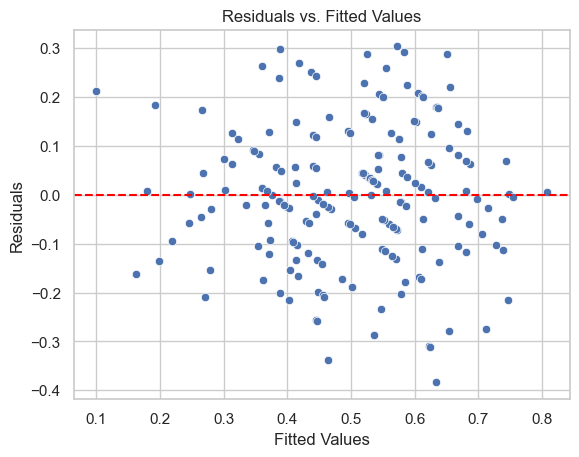

In [74]:
# Extract residuals and fitted values
residuals = mult_model.resid
fitted_values = mult_model.fittedvalues

# Create the plot
sns_plot1 = sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs. Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

# plt.savefig("WLP_Resid_Fitted_Vals_avg_gini_cap_perc_sum_2015_2020.png",dpi=300)


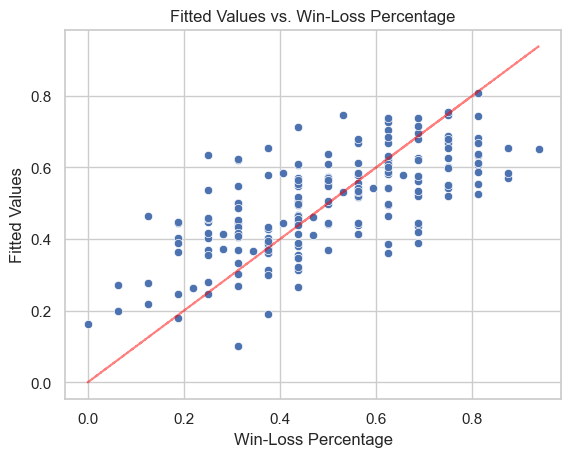

In [75]:
# Create the plot
wlp2_1d = wlp2['win_loss_perc'].to_numpy()
wlp2_1d.shape


sns.scatterplot(x=wlp2_1d, y=fitted_values)
plt.plot(wlp2_1d,wlp2_1d, color='red',linestyle='--',alpha=0.5)
plt.title("Fitted Values vs. Win-Loss Percentage")
plt.xlabel("Win-Loss Percentage")
plt.ylabel("Fitted Values")
plt.show()

# plt.savefig("WLP_avg_gini_cap_perc_sum_vs_Fitted_2015_2020.png",dpi=300)


Residuals more dispersed than full model; more data above line at lower end and below line at higher end - model is predicting closer to avg values

In [76]:
pd.reset_option('display.max_rows',None)

In [77]:
print(df_nfl_combined_2014_2020.dtypes)

team_x                    object
season                   float64
cap_hit_gini_coef        float64
avg_gini_coef_2_years    float64
cap_hit_sum              float64
cap_percent_sum          float64
team_name_2               object
year                       int64
team_y                    object
wins                       int64
losses                     int64
win_loss_perc            float64
points                     int64
points_opp                 int64
points_diff                int64
mov                      float64
g                          int64
total_yards                int64
plays_offense              int64
yds_per_play_offense     float64
turnovers                  int64
fumbles_lost               int64
first_down                 int64
pass_cmp                   int64
pass_att                   int64
pass_yds                   int64
pass_td                    int64
pass_int                   int64
pass_net_yds_per_att     float64
pass_fd                    int64
rush_att  

In [ ]:
team_x                    object
season                   float64
cap_hit_gini_coef        float64
avg_gini_coef_2_years    float64
cap_hit_sum              float64
team_name_2               object
year                       int64
team_y                    object
wins                       int64
losses                     int64
win_loss_perc            float64
points                     int64
points_opp                 int64
points_diff                int64
mov                      float64
g                          int64
total_yards                int64
plays_offense              int64
yds_per_play_offense     float64
turnovers                  int64
fumbles_lost               int64
first_down                 int64
pass_cmp                   int64
pass_att                   int64
pass_yds                   int64
pass_td                    int64
pass_int                   int64
pass_net_yds_per_att     float64
pass_fd                    int64
rush_att                   int64
rush_yds                   int64
rush_td                    int64
rush_yds_per_att         float64
rush_fd                    int64


                       win_loss_perc
win_loss_perc               1.000000
cap_hit_sum                 0.646790
cap_percent_sum             0.672138
cap_hit_gini_coef          -0.236051
avg_gini_coef_2_years      -0.274224
points_opp                 -0.668621
pass_yds                    0.269035
rush_yds                    0.396077
turnovers                  -0.572515
penalties                  -0.091520


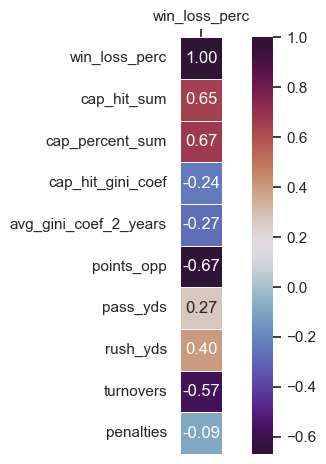

In [78]:
df_nfl_combined_modeling_vars_wtarget = df_nfl_combined_2014_2020[df_nfl_combined_2014_2020['season']>2014][['win_loss_perc','cap_hit_sum','cap_percent_sum','cap_hit_gini_coef','avg_gini_coef_2_years','points_opp','pass_yds','rush_yds','turnovers','penalties']]
# 'avg_gini_coef_2_years',



combined_corr_matrix = df_nfl_combined_modeling_vars_wtarget.corr()

combined_corr_matrix = combined_corr_matrix[['win_loss_perc']]
print(combined_corr_matrix)

# plt.figure(figsize=(10,10))
#
heatmap = sns.heatmap(
    combined_corr_matrix,
    annot=True,
    cmap='twilight_shifted',
    fmt=".2f",
    linewidths=0.5,
    square=True
)
heatmap.xaxis.tick_top()
# heatmap.set_xticklabels(rotation=30)
plt.tight_layout()
# heatmap.savefig("WLP_w_pred_vars_heatmap_2015_2020.png",dpi=300)



In [79]:
df_nfl_combined_modeling_vars = df_nfl_combined_2014_2020[df_nfl_combined_2014_2020['season']>2014][['cap_percent_sum','avg_gini_coef_2_years','plays_offense','yds_per_play_offense','penalties','points_opp','pass_yds','rush_yds','turnovers']]
# 'avg_gini_coef_2_years',


combined_corr_matrix = df_nfl_combined_modeling_vars.corr()

combined_corr_matrix

,cap_percent_sum,avg_gini_coef_2_years,plays_offense,yds_per_play_offense,penalties,points_opp,pass_yds,rush_yds,turnovers
cap_percent_sum,1.000000,-0.207047,0.207949,0.372905,-0.058019,-0.518288,0.350601,0.121999,-0.299067
avg_gini_coef_2_years,-0.207047,1.000000,-0.090579,-0.005449,0.161045,0.333919,0.047794,-0.159661,0.086850
plays_offense,0.207949,-0.090579,1.000000,0.091566,-0.049309,-0.087150,0.477465,0.091287,0.068204
yds_per_play_offense,0.372905,-0.005449,0.091566,1.000000,0.032865,-0.023855,0.712297,0.336076,-0.321961
penalties,-0.058019,0.161045,-0.049309,0.032865,1.000000,0.052722,0.064862,-0.090028,0.091758
points_opp,-0.518288,0.333919,-0.087150,-0.023855,0.052722,1.000000,0.085247,-0.248576,0.392684
pass_yds,0.350601,0.047794,0.477465,0.712297,0.064862,0.085247,1.000000,-0.265247,-0.050671
rush_yds,0.121999,-0.159661,0.091287,0.336076,-0.090028,-0.248576,-0.265247,1.000000,-0.332293
turnovers,-0.299067,0.086850,0.068204,-0.321961,0.091758,0.392684,-0.050671,-0.332293,1.000000


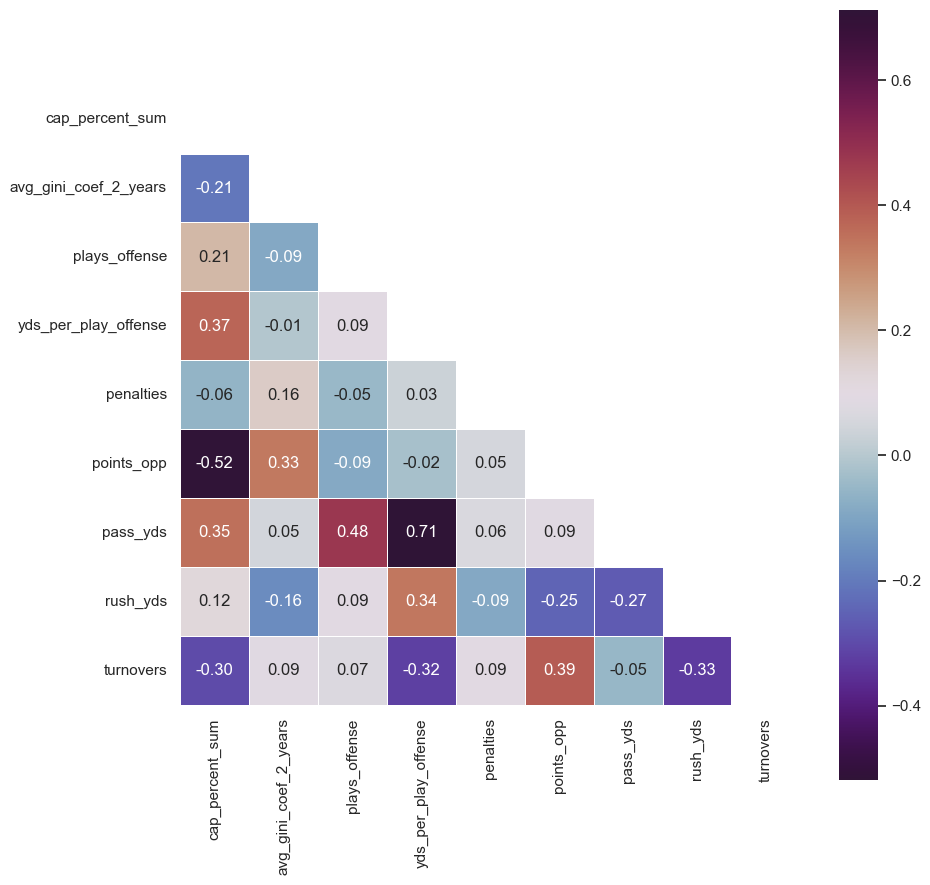

In [80]:
plt.figure(figsize=(10,10))
plt.grid(False)

mask = np.zeros_like(combined_corr_matrix)
mask[np.triu_indices_from(mask)] = True
graph1 = sns.heatmap(
    combined_corr_matrix,
    annot=True,
    # cmap='RdYlBu_r',
    cmap='twilight_shifted',
    fmt=".2f",
    linewidths=0.5,
    square=True,
    mask=mask
)



In [81]:
#  Multiple linear regression with avg 2 year gini coefficient and sum of cap hit

#  OLS Regression Results
# ==============================================================================
# Dep. Variable:          win_loss_perc   R-squared:                       0.759
# Model:                            OLS   Adj. R-squared:                  0.747
# Method:                 Least Squares   F-statistic:                     63.70
# Date:                Mon, 05 Jan 2026   Prob (F-statistic):           1.48e-51
# Time:                        20:41:07   Log-Likelihood:                 178.20
# No. Observations:                 192   AIC:                            -336.4
# Df Residuals:                     182   BIC:                            -303.8
# Df Model:                           9
# Covariance Type:            nonrobust
# =========================================================================================
#                             coef    std err          t      P>|t|      [0.025      0.975]
# -----------------------------------------------------------------------------------------
# const                     1.6572      1.207      1.373      0.171      -0.724       4.038
# cap_percent_sum           0.0043      0.001      5.462      0.000       0.003       0.006
# avg_gini_coef_2_years    -0.2328      0.229     -1.015      0.312      -0.685       0.220
# plays_offense            -0.0013      0.001     -1.083      0.280      -0.004       0.001
# yds_per_play_offense     -0.2104      0.223     -0.942      0.347      -0.651       0.230
# penalties                -0.0004      0.000     -0.743      0.458      -0.001       0.001
# points_opp               -0.0013      0.000     -7.784      0.000      -0.002      -0.001
# pass_yds                  0.0003      0.000      1.409      0.161      -0.000       0.001
# rush_yds                  0.0004      0.000      1.641      0.103   -7.49e-05       0.001
# turnovers                -0.0075      0.001     -5.300      0.000      -0.010      -0.005
# ==============================================================================
# Omnibus:                        1.586   Durbin-Watson:                   2.090
# Prob(Omnibus):                  0.452   Jarque-Bera (JB):                1.262
# Skew:                          -0.183   Prob(JB):                        0.532
# Kurtosis:                       3.156   Cond. No.                     7.55e+05
# ==============================================================================


#  OLS Regression Results
# ==============================================================================
# Dep. Variable:          win_loss_perc   R-squared:                       0.756
# Model:                            OLS   Adj. R-squared:                  0.748
# Method:                 Least Squares   F-statistic:                     95.63
# Date:                Mon, 05 Jan 2026   Prob (F-statistic):           5.09e-54
# Time:                        20:25:47   Log-Likelihood:                 177.08
# No. Observations:                 192   AIC:                            -340.2
# Df Residuals:                     185   BIC:                            -317.3
# Df Model:                           6
# Covariance Type:            nonrobust
# =========================================================================================
#                             coef    std err          t      P>|t|      [0.025      0.975]
# -----------------------------------------------------------------------------------------
# const                     0.3710      0.174      2.128      0.035       0.027       0.715
# cap_percent_sum           0.0044      0.001      5.624      0.000       0.003       0.006
# avg_gini_coef_2_years    -0.2506      0.226     -1.109      0.269      -0.696       0.195
# points_opp               -0.0013      0.000     -7.786      0.000      -0.002      -0.001
# pass_yds               9.434e-05   1.55e-05      6.070      0.000    6.37e-05       0.000
# rush_yds                  0.0002   2.48e-05      6.126      0.000       0.000       0.000
# turnovers                -0.0079      0.001     -5.806      0.000      -0.011      -0.005
# ==============================================================================
# Omnibus:                        1.172   Durbin-Watson:                   2.110
# Prob(Omnibus):                  0.557   Jarque-Bera (JB):                0.938
# Skew:                          -0.166   Prob(JB):                        0.626
# Kurtosis:                       3.086   Cond. No.                     1.61e+05
# ==============================================================================

# Removed penalties, then yards per play offense, then plays offense
# Tried adding penalty yards, but it was also a very insignificant variable
#   Teams that have more penalties are trying harder to make big plays/competing harder?



# Best model (based on AIC and BIC) does not include gini coefficient, penalties variables, or plays_offense
#
#                             OLS Regression Results
# ==============================================================================
# Dep. Variable:          win_loss_perc   R-squared:                       0.755
# Model:                            OLS   Adj. R-squared:                  0.748
# Method:                 Least Squares   F-statistic:                     114.4
# Date:                Mon, 05 Jan 2026   Prob (F-statistic):           8.30e-55
# Time:                        20:28:50   Log-Likelihood:                 176.44
# No. Observations:                 192   AIC:                            -340.9
# Df Residuals:                     186   BIC:                            -321.3
# Df Model:                           5
# Covariance Type:            nonrobust
# ===================================================================================
#                       coef    std err          t      P>|t|      [0.025      0.975]
# -----------------------------------------------------------------------------------
# const               0.2242      0.113      1.976      0.050       0.000       0.448
# cap_percent_sum     0.0045      0.001      5.688      0.000       0.003       0.006
# points_opp         -0.0013      0.000     -8.309      0.000      -0.002      -0.001
# pass_yds         9.412e-05   1.55e-05      6.053      0.000    6.34e-05       0.000
# rush_yds            0.0002   2.47e-05      6.255      0.000       0.000       0.000
# turnovers          -0.0077      0.001     -5.732      0.000      -0.010      -0.005
# ==============================================================================
# Omnibus:                        1.473   Durbin-Watson:                   2.113
# Prob(Omnibus):                  0.479   Jarque-Bera (JB):                1.193
# Skew:                          -0.184   Prob(JB):                        0.551
# Kurtosis:                       3.116   Cond. No.                     6.80e+04
# ==============================================================================
#



x = sm.add_constant(df_nfl_combined_modeling_vars)

mult_model = sm.OLS(wlp2,x).fit()
print(mult_model.summary())

                            OLS Regression Results                            
Dep. Variable:          win_loss_perc   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     63.70
Date:                Sun, 11 Jan 2026   Prob (F-statistic):           1.48e-51
Time:                        14:31:44   Log-Likelihood:                 178.20
No. Observations:                 192   AIC:                            -336.4
Df Residuals:                     182   BIC:                            -303.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.65

In [82]:
wlp2_1d = wlp2['win_loss_perc'].to_numpy()
wlp2_1d.shape


(192,)

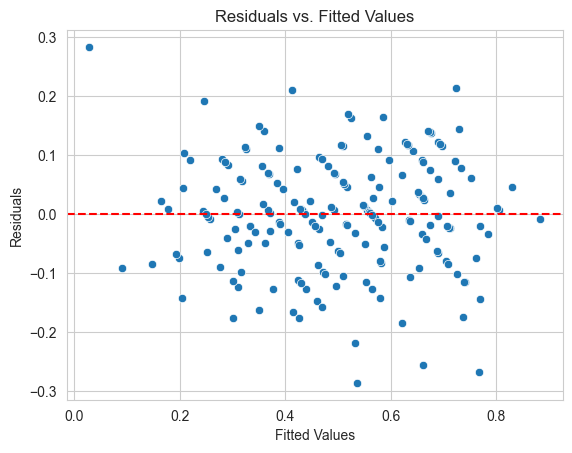

<Figure size 640x480 with 0 Axes>

In [72]:
# Extract residuals and fitted values
residuals = mult_model.resid
fitted_values = mult_model.fittedvalues

# Create the plot
sns_plot1 = sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs. Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

# plt.savefig("WLP_Resid_Fitted_Vals_2015_2020.png",dpi=300)



In [69]:
fitted_values.shape

(192,)

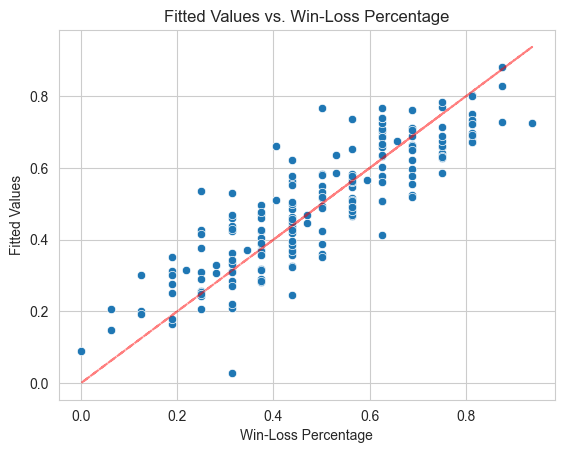

<Figure size 640x480 with 0 Axes>

In [73]:
# Create the plot
sns.scatterplot(x=wlp2_1d, y=fitted_values)
plt.plot(wlp2_1d,wlp2_1d, color='red',linestyle='--',alpha=0.5)
plt.title("Fitted Values vs. Win-Loss Percentage")
plt.xlabel("Win-Loss Percentage")
plt.ylabel("Fitted Values")
plt.show()

# plt.savefig("WLP_vs_Fitted_Vals_2015_2020.png",dpi=300)



In [ ]:



Model predicts more wins at low end, and fewer wins at high end

Can create polynomial regression and check results








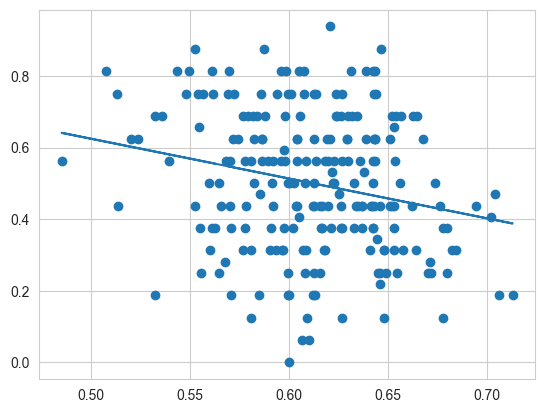

In [79]:
from scipy import stats

slope, intercept, r, p, std_err = stats.linregress(chgc, wlp)

def myfunc(x):
    return slope * x + intercept

mymodel = list(map(myfunc, df_nfl_combined_2014_2020['cap_hit_gini_coef']))

plt.scatter(chgc, wlp)
plt.plot(chgc, mymodel)
plt.show()


C:\Users\efrui\PyCharmMiscProject\.venv\Lib\site-packages\pandas\core\internals\blocks.py:395: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


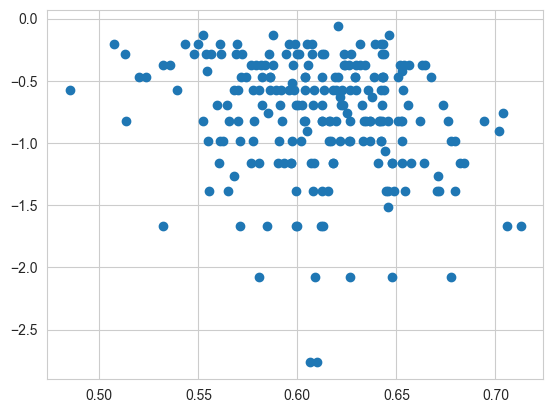

In [80]:
plt.scatter(chgc, np.log(wlp))


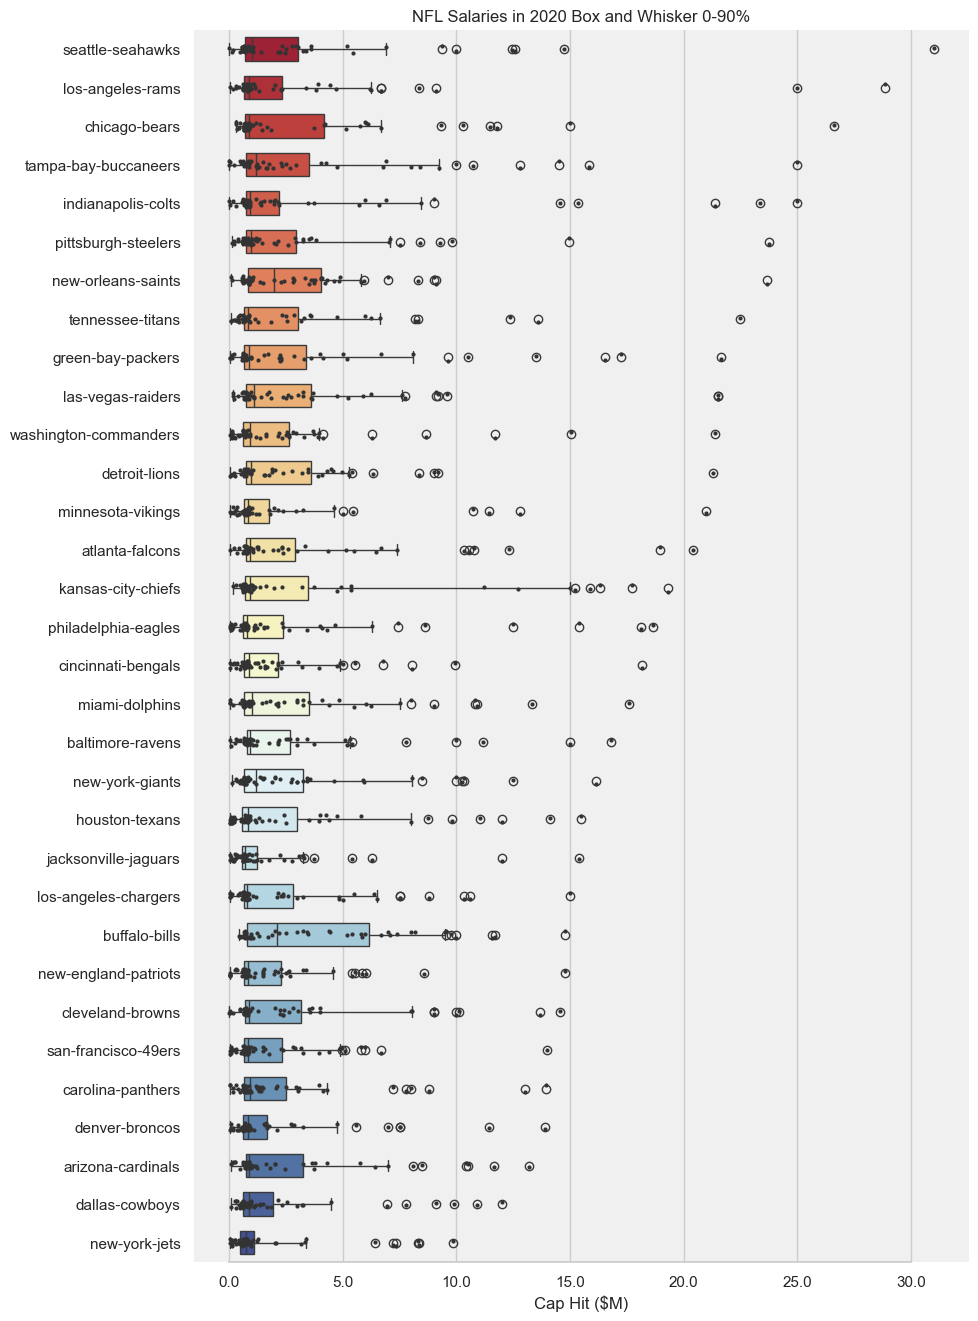

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")
sns.set_style("whitegrid")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 16))
# ax.set_xscale("log")
ax.set_facecolor('#f0f0f0')


# Load the example planets dataset
# salaries = sns.load_dataset("")

# Plot the orbital period with horizontal boxes
sns.boxplot(
    df_nfl_salaries[df_nfl_salaries['season']==2020], x="cap_hit", y="team", hue="team",
    whis=[0, 90], width=.6, palette = 'RdYlBu'
    # , palette="vlag"
)

# Add in points to show each observation
sns.stripplot(df_nfl_salaries[df_nfl_salaries['season']==2020], x="cap_hit", y="team", size=3, color=".2")

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
ax.set(xlabel="Cap Hit ($M)")
ax.set_xticks(ticks=np.linspace(0,30000000,7),labels=np.linspace(0,30,7))
ax.set_title("NFL Salaries in 2020 Box and Whisker 0-90%")
sns.despine()
sns.despine(trim=True, left=True)

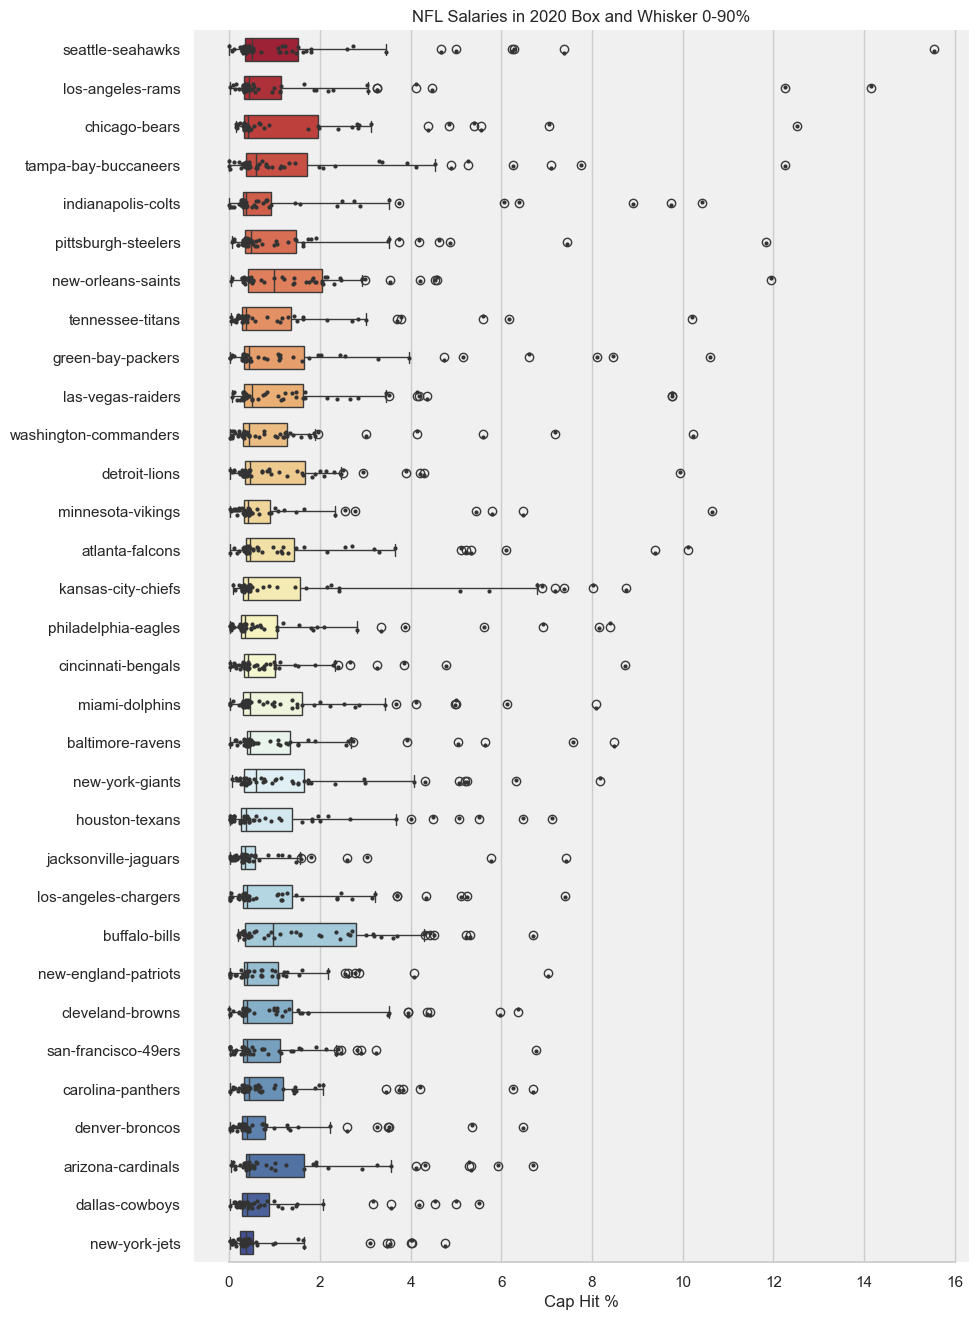

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")
sns.set_style("whitegrid")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 16))
# ax.set_xscale("log")
ax.set_facecolor('#f0f0f0')


# Load the example planets dataset
# salaries = sns.load_dataset("")

# Plot the orbital period with horizontal boxes
sns.boxplot(
    df_nfl_salaries[df_nfl_salaries['season']==2020], x="cap_percent", y="team", hue="team",
    whis=[0, 90], width=.6, palette = 'RdYlBu'
    # , palette="vlag"
)

# Add in points to show each observation
sns.stripplot(df_nfl_salaries[df_nfl_salaries['season']==2020], x="cap_percent", y="team", size=3, color=".2")

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
ax.set(xlabel="Cap Hit %")
# ax.set_xticks(ticks=np.linspace(0,30000000,7),labels=np.linspace(0,30,7))
ax.set_title("NFL Salaries in 2020 Box and Whisker 0-90%")
sns.despine()
sns.despine(trim=True, left=True)

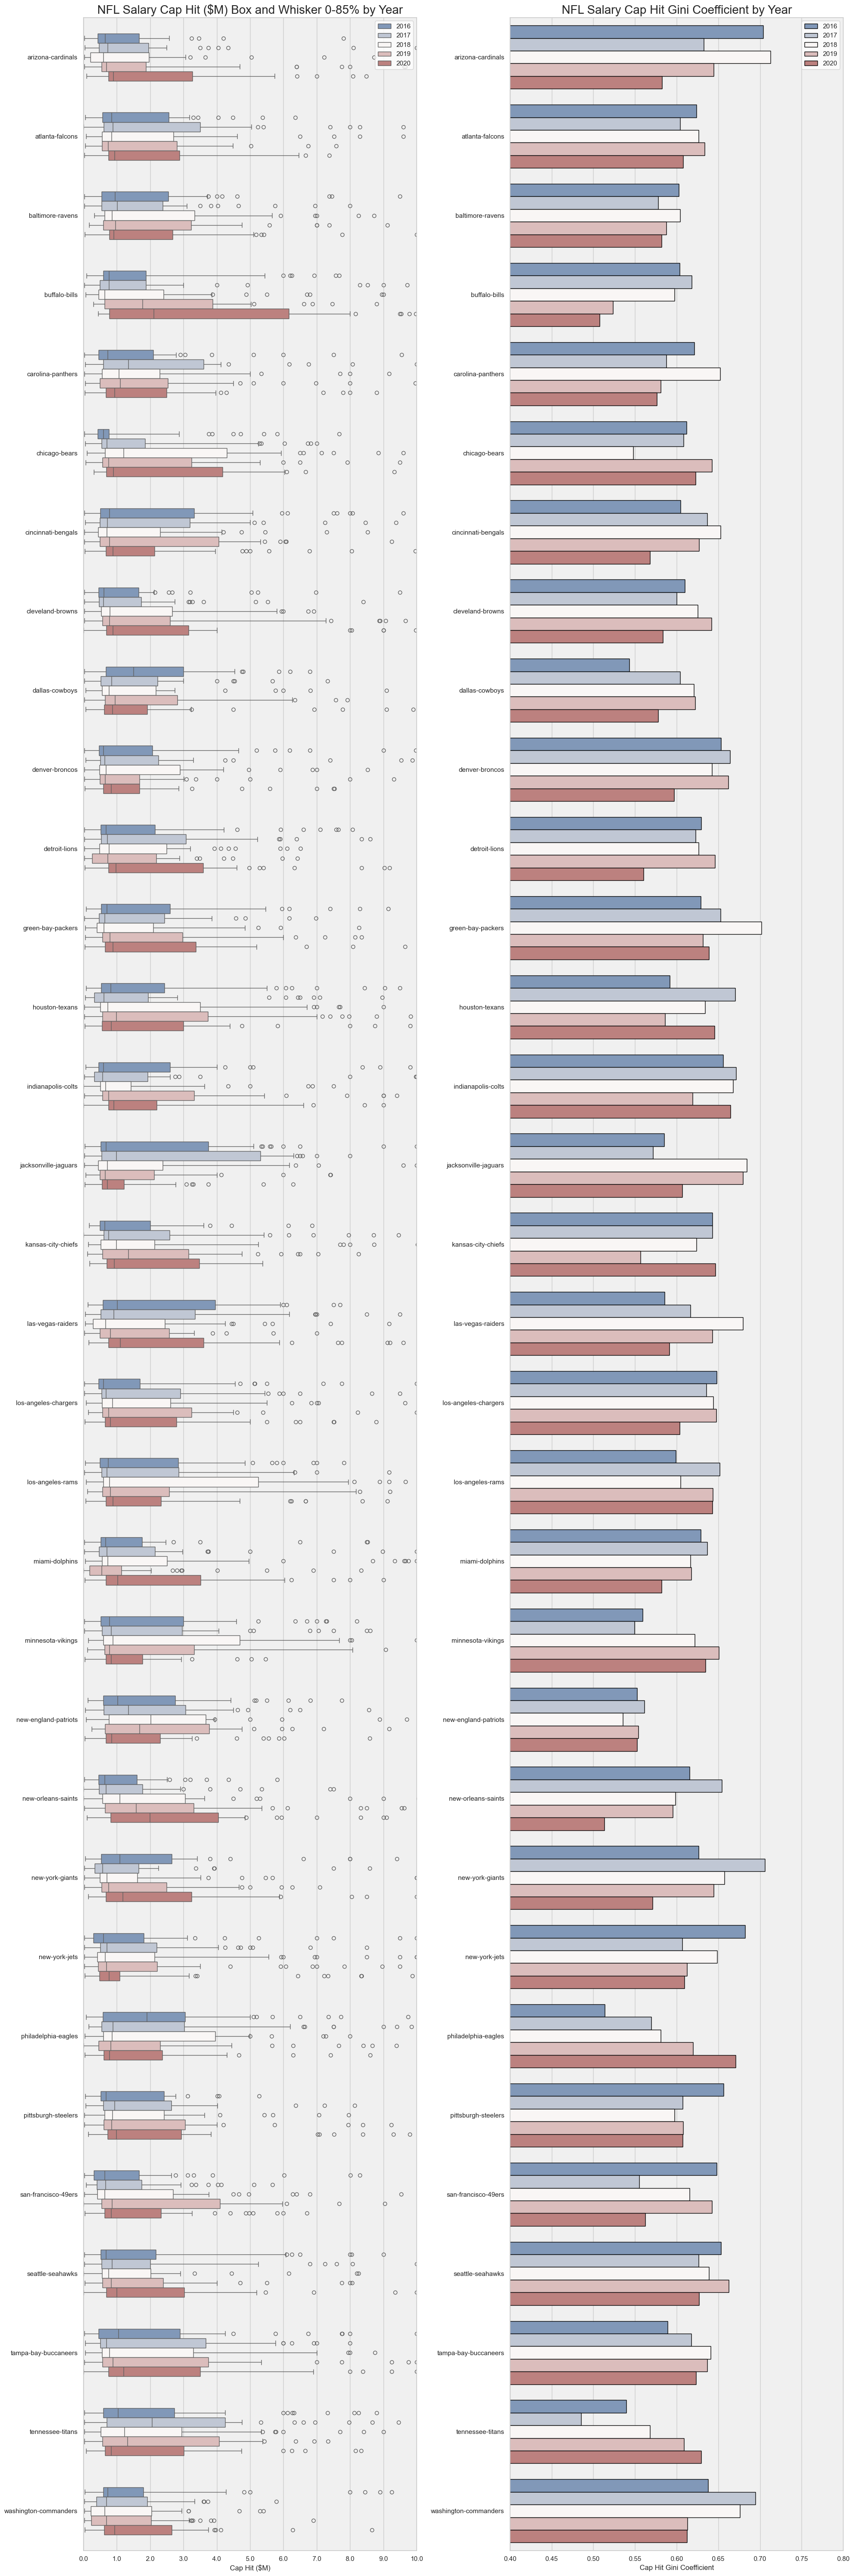

In [64]:

sns.set_theme(style="ticks")
sns.set_style("whitegrid")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(1,2,figsize=(20, 60))
# ax.set_xscale("log")
ax[0].set_facecolor('#f0f0f0')
ax[1].set_facecolor('#f0f0f0')


# Load the example planets dataset
# salaries = sns.load_dataset("")

palette = sns.color_palette("vlag",n_colors=5)

# x="cap_percent"
sns.boxplot(
    df_nfl_salaries[df_nfl_salaries['season']>2015], x="cap_hit", y="team", hue="season",
    whis=[0,85], width=.6, ax=ax[0]
    ,order=df_nfl_salaries.sort_values('team').team
    ,palette=palette
    ,color="0.2"
    # , palette="vlag"
)

# Add in points to show each observation
# sns.stripplot(df_nfl_salaries, x="cap_hit", y="team", size=3, color=".2")

# Tweak the visual presentation
ax[0].set_facecolor('#f0f0f0')
ax[0].xaxis.grid(True)
ax[0].set(ylabel="")
ax[0].set(xlabel="Cap Hit ($M)")
ax[0].set_xlim(0,10000000)
ax[0].set_xticks(ticks=np.linspace(0,10000000,11),labels=np.linspace(0,10,11))
ax[0].set_title("NFL Salary Cap Hit ($M) Box and Whisker 0-85% by Year", size = 20)
ax[0].legend(loc="upper right")
# sns.despine()
# sns.despine(trim=True, left=True)


# Plot 2
# f, ax = plt.subplots(figsize=(8, 25))

# ax.set_facecolor('#f0f0f0')
sns.barplot(data=df_gini_team[df_gini_team['season']>2015], y="team", x="cap_hit_gini_coef",
            hue="season",ax=ax[1],palette=palette
            ,color="0.2"
            ,edgecolor="black")
# [df_gini_team['season']>2014]
# plt.xlim([0.4,0.8])
ax[1].set_xlim(0.4,0.8)
ax[1].set(xlabel="Cap Hit Gini Coefficient")
ax[1].set(ylabel="")
ax[1].set_title("NFL Salary Cap Hit Gini Coefficient by Year", size = 20)
ax[1].legend(loc="upper right")



plt.tight_layout()

plt.savefig('Box_Whisker_and_Gini_Coef.png',dpi=300)


In [66]:
teamlist = ['arizona-cardinals','atlanta-falcons','baltimore-ravens','buffalo-bills','carolina-panthers','chicago-bears']

df_nfl_salaries_6teams = df_nfl_salaries[df_nfl_salaries['team'].isin(teamlist)]
df_gini_team_6teams = df_gini_team[df_gini_team['team'].isin(teamlist)]

In [67]:
df_nfl_salaries_6teams.head()

,name,pos,cap_hit,cap_percent,season,team
4,Khalil Mack,OLB,26600000,12.52,2020,chicago-bears
12,Joe Flacco,QB,24750000,13.71,2018,baltimore-ravens
13,Joe Flacco,QB,24550000,15.02,2017,baltimore-ravens
23,Matt Ryan,QB,23750000,14.28,2017,atlanta-falcons
24,Matt Ryan,QB,23750000,14.96,2016,atlanta-falcons


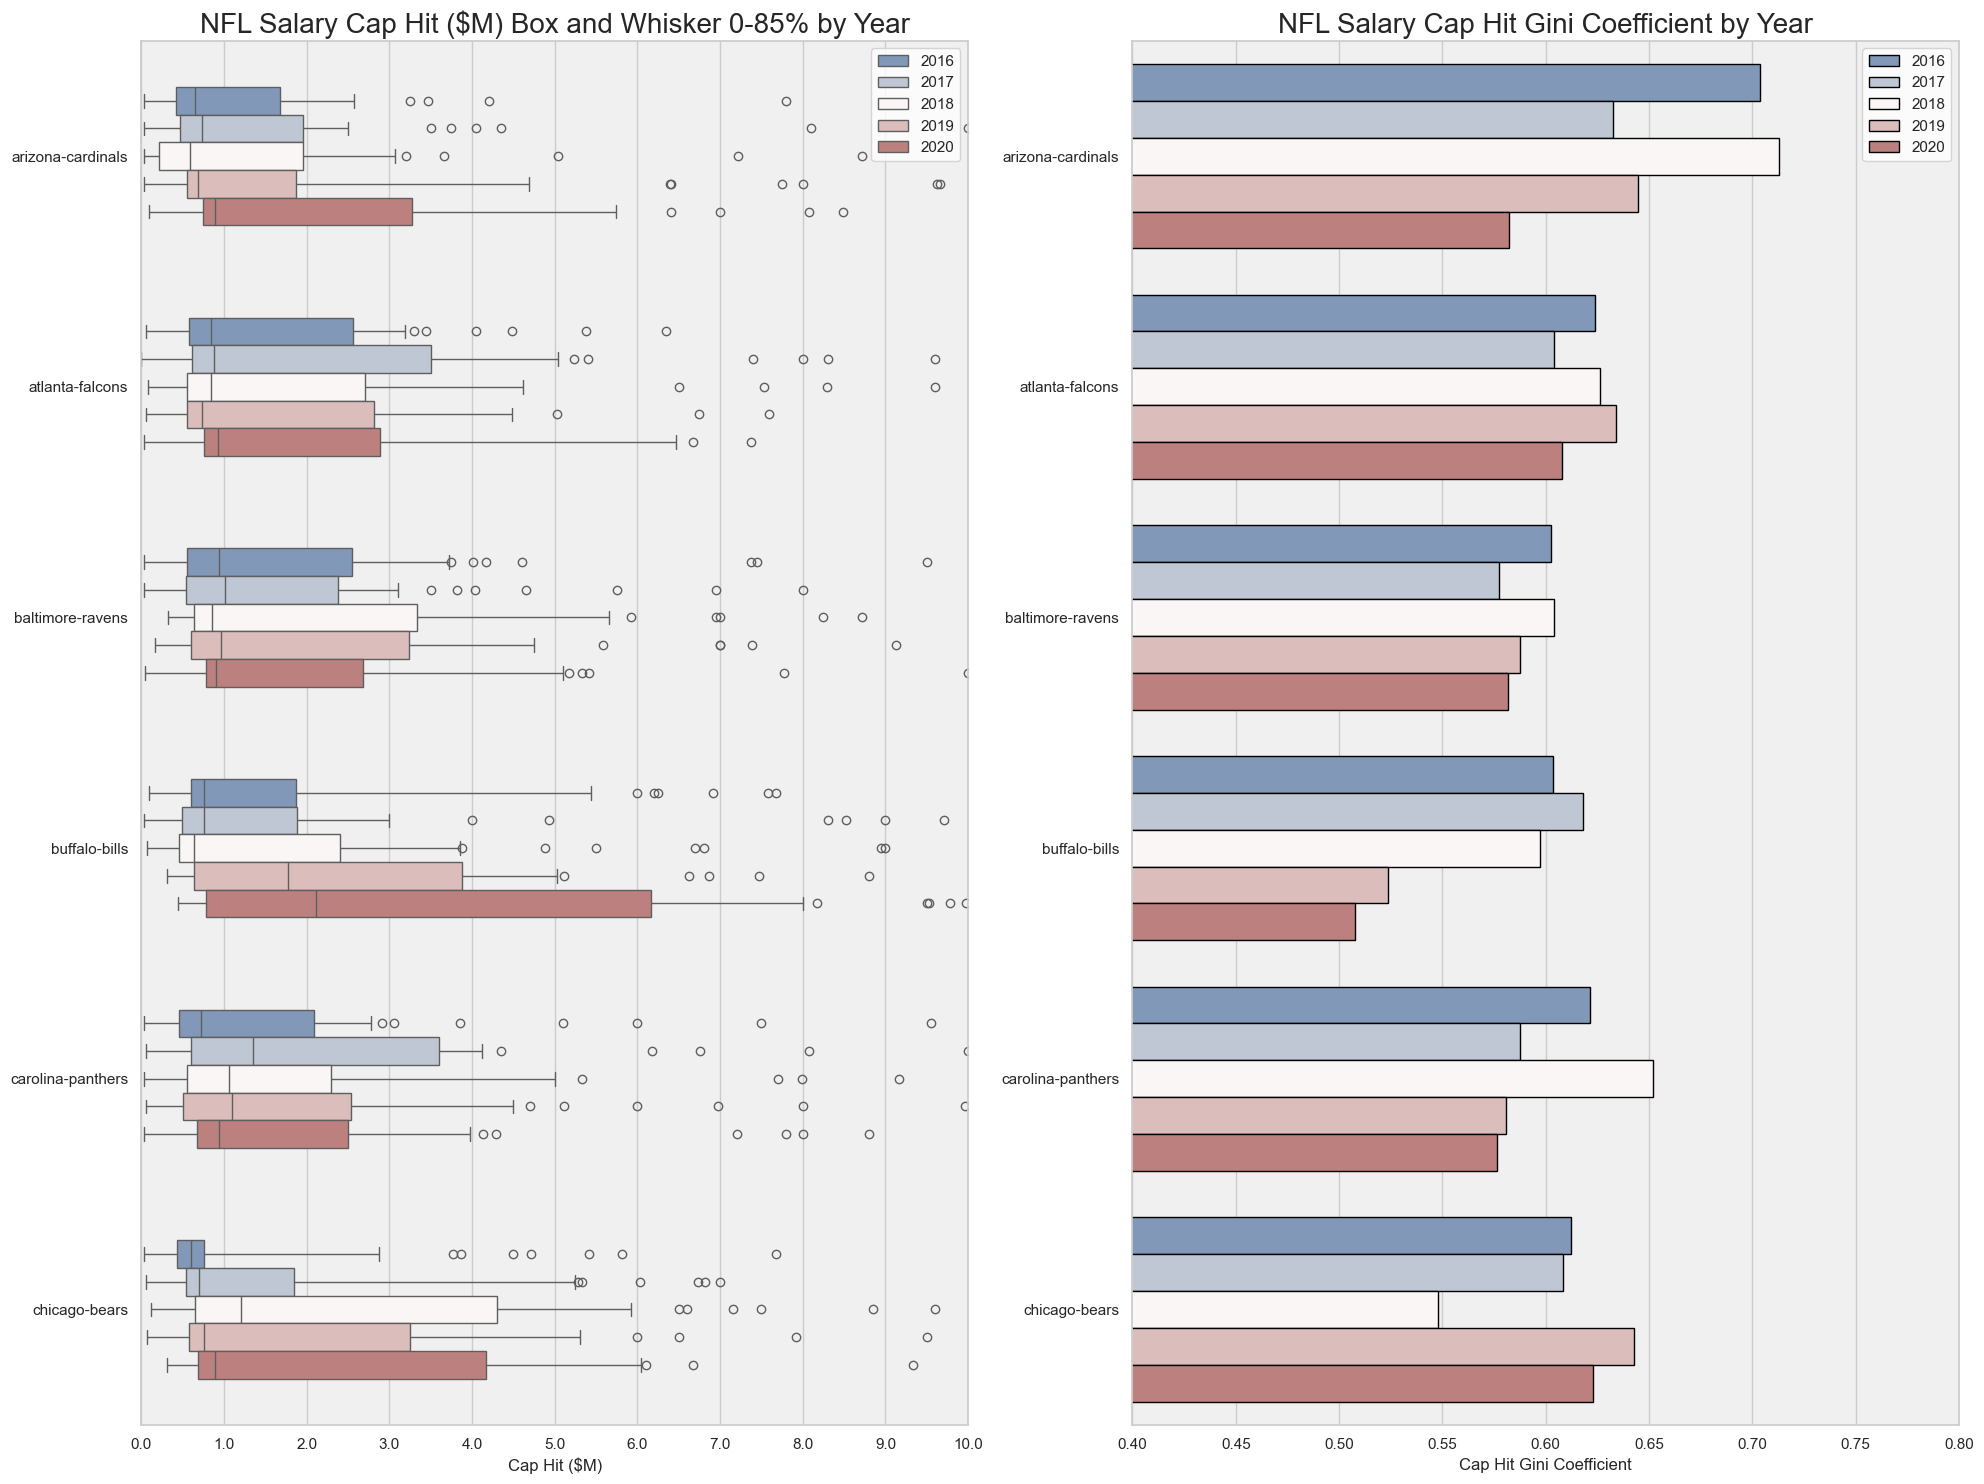

In [68]:

sns.set_theme(style="ticks")
sns.set_style("whitegrid")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(1,2,figsize=(20, 15))
# ax.set_xscale("log")
ax[0].set_facecolor('#f0f0f0')
ax[1].set_facecolor('#f0f0f0')


# Load the example planets dataset
# salaries = sns.load_dataset("")

palette = sns.color_palette("vlag",n_colors=5)

# x="cap_percent"
sns.boxplot(
    df_nfl_salaries_6teams[df_nfl_salaries_6teams['season']>2015], x="cap_hit", y="team", hue="season",
    whis=[0,85], width=.6, ax=ax[0]
    ,order=df_nfl_salaries_6teams.sort_values('team').team
    ,palette=palette
    ,color="0.2"
    # , palette="vlag"
)

# Add in points to show each observation
# sns.stripplot(df_nfl_salaries, x="cap_hit", y="team", size=3, color=".2")

# Tweak the visual presentation
ax[0].set_facecolor('#f0f0f0')
ax[0].xaxis.grid(True)
ax[0].set(ylabel="")
ax[0].set(xlabel="Cap Hit ($M)")
ax[0].set_xlim(0,10000000)
ax[0].set_xticks(ticks=np.linspace(0,10000000,11),labels=np.linspace(0,10,11))
ax[0].set_title("NFL Salary Cap Hit ($M) Box and Whisker 0-85% by Year", size=20)
ax[0].legend(loc="upper right")
# sns.despine()
# sns.despine(trim=True, left=True)


# Plot 2
# f, ax = plt.subplots(figsize=(8, 25))

# ax.set_facecolor('#f0f0f0')
sns.barplot(data=df_gini_team_6teams[df_gini_team_6teams['season']>2015], y="team", x="cap_hit_gini_coef",
            hue="season",ax=ax[1],palette=palette
            ,color="0.2"
            ,edgecolor="black")
# [df_gini_team['season']>2014]
# plt.xlim([0.4,0.8])
ax[1].set_xlim(0.4,0.8)
ax[1].set(xlabel="Cap Hit Gini Coefficient")
ax[1].set(ylabel="")
ax[1].set_title("NFL Salary Cap Hit Gini Coefficient by Year",size=20)
ax[1].legend(loc="upper right")



plt.tight_layout()

plt.savefig('Box_Whisker_and_Gini_Coef_6teams.png',dpi=300)


In [ ]:
add data for average gini coefficient from previous 2 season and previous 2 seasons + current season

add total cap hit
add max salary
add mean salary
add median salary
replace redundant team names with latest team name

compare gini coefficients with box and whisker plots

create linear regression with other variables from team stats data set



gini coefficient significant in salary data regression - just cap percent sum and gini coefficient, which are variables determined before the season starts.  The other variables are more significant/predictive, but they are determined during the season

sum cap percent is very predictive because teams save cap space when theyre rebuilding then use their saved cap space and use a greater portion of their cap space when theyre trying to win the super bowl.  they also pay players who perform well, so a greater percentage of cap space used may indicate key players have grown their skills


In the box and whisker plot, lower medians correspond to greater gini coefficients.  The width of the interquartile range and the distance of the upper whisker dont have as much effect.  The league salary cap rises each year, so median team cap amounts should generally rise as well.  Thats seen in the graph.

Be mindful of scale of bar plot on right - gini coefficient varies less between teams and years than it appears, because the x-axis starts at 0.4




Text(0.5, 1.0, 'NFL Salary Cap Hit Gini Coefficient')

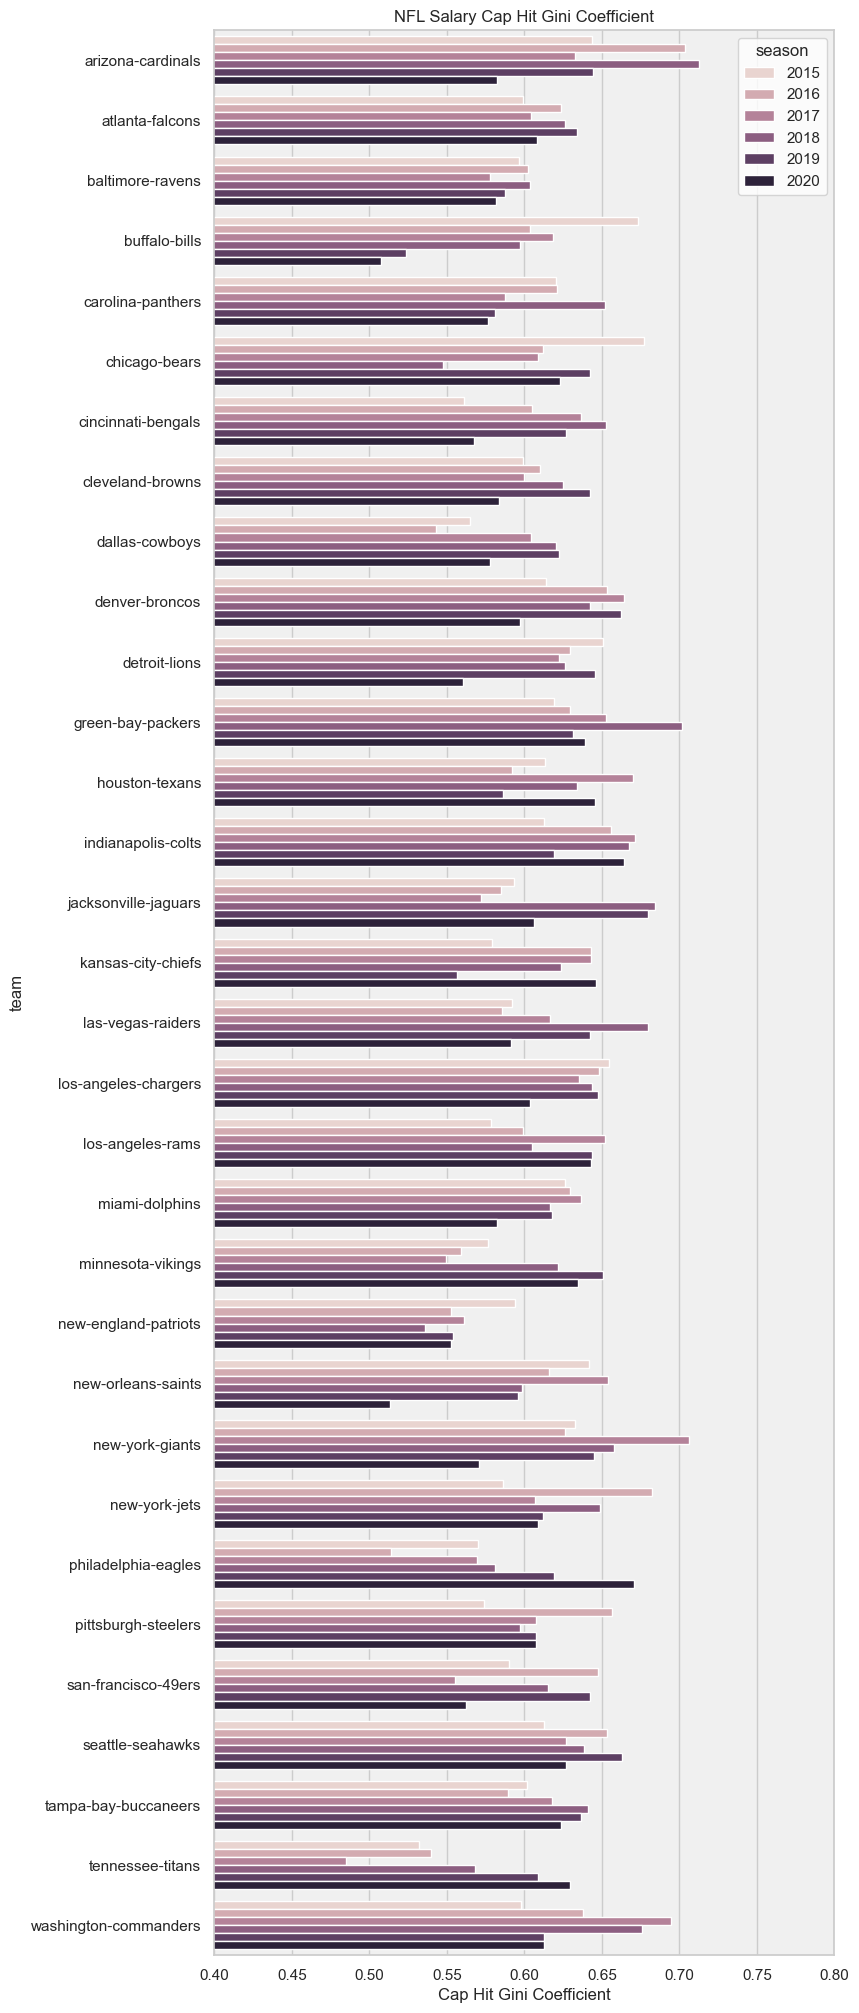

In [155]:

# plt.plot(figsize=(20,15))
f, ax = plt.subplots(figsize=(8, 25))

ax.set_facecolor('#f0f0f0')
# sns.color_palette("BrBG")
sns.barplot(data=df_gini_team[df_gini_team['season']>2014], y="team", x="cap_hit_gini_coef", hue="season")
plt.xlim([0.4,0.8])
ax.set(xlabel="Cap Hit Gini Coefficient")
ax.set_title("NFL Salary Cap Hit Gini Coefficient")


## Machine Learning Linear and Polynomial Regression

In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


df_nfl_combined_modeling_vars_wtarget = df_nfl_combined_2014_2020[df_nfl_combined_2014_2020['season']>2014][['win_loss_perc','cap_hit_sum','cap_percent_sum','cap_hit_gini_coef','avg_gini_coef_2_years','points_opp','pass_yds','rush_yds','yds_per_play_offense','turnovers','penalties']]
# ,'cap_hit_sum',


X = df_nfl_combined_modeling_vars_wtarget.drop('win_loss_perc',axis=1)
y = df_nfl_combined_modeling_vars_wtarget['win_loss_perc']


# random_state:
# https://stackoverflow.com/questions/28064634/random-state-pseudo-random-number-in-scikit-learn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)



In [116]:
df_nfl_combined_modeling_vars_wtarget.shape

(192, 11)

In [117]:
X_train

,cap_hit_sum,cap_percent_sum,cap_hit_gini_coef,avg_gini_coef_2_years,points_opp,pass_yds,rush_yds,yds_per_play_offense,turnovers,penalties
182,0.685439,67.82,0.604090,0.573695,332,3141,2170,5.3,22,97
243,0.911112,86.20,0.619009,0.609313,323,3503,1850,5.1,17,105
433,0.767226,75.88,0.559325,0.567984,307,3836,1205,5.0,16,103
668,0.665474,63.07,0.612625,0.612785,329,3465,1611,4.8,27,87
498,0.663311,66.16,0.657583,0.681790,412,4047,1650,5.8,19,114
...,...,...,...,...,...,...,...,...,...,...
225,0.618373,60.39,0.626419,0.624475,360,3576,1660,5.1,19,94
247,0.870736,83.16,0.631405,0.666528,313,3733,1795,5.4,13,100
288,0.656266,59.92,0.667567,0.669471,344,4461,1718,5.8,24,120
38,0.838343,82.25,0.607846,0.620846,414,4363,1532,5.5,18,83


In [118]:
model = LinearRegression()

model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [119]:
# We only pass in test features
# The model predicts its own y hat
# We can then compare these results to the true y test label value
test_predictions = model.predict(X_test)

In [120]:
test_predictions

array([0.38295585, 0.39764986, 0.36058123, 0.30786262, 0.63850487,
       0.52104319, 0.14749994, 0.31641237, 0.56981837, 0.68782351,
       0.35734181, 0.74406198, 0.64225627, 0.67195442, 0.54202173,
       0.37021797, 0.25248305, 0.65252234, 0.81157083, 0.33083224,
       0.32505708, 0.7155221 , 0.60868004, 0.46545589, 0.30960547,
       0.51821797, 0.8453308 , 0.62506223, 0.48159023, 0.59877641,
       0.41820651, 0.36347879, 0.44448411, 0.47023403, 0.86791114,
       0.30074421, 0.17487306, 0.49588648, 0.33350967, 0.45605236,
       0.2985718 , 0.31701449, 0.39277264, 0.75732922, 0.44464671,
       0.21193231, 0.3686979 , 0.57286277, 0.19639337, 0.79128717,
       0.29412594, 0.69913032, 0.02351571, 0.66509457, 0.48406358,
       0.56872522, 0.28346712, 0.6411227 ])

In [121]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [122]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

RMSE

np.float64(0.0948733099772544)

In [139]:
MSE

0.009000944946040201

In [125]:
MAE

0.07356986822919122

In [126]:
df_nfl_combined_modeling_vars_wtarget['win_loss_perc'].mean()

np.float64(0.5002604166666665)

In [127]:
# If our model was perfect, these would all be zeros
test_res = y_test - test_predictions
test_res

180   -0.132956
562    0.102350
307   -0.172581
118   -0.119863
395   -0.013505
121   -0.021043
311   -0.084500
143   -0.035412
540   -0.006818
583    0.125176
97     0.017658
79    -0.119062
139   -0.236256
477    0.141046
223    0.020978
584    0.004782
499   -0.002483
601    0.003478
457   -0.061571
414    0.107168
54    -0.012057
327   -0.027522
328    0.141320
119   -0.152456
141    0.065395
202    0.044782
454    0.029669
330    0.124938
541    0.081410
476    0.089224
411   -0.043207
518   -0.050479
537   -0.006484
350   -0.095234
58     0.007089
287   -0.050744
521   -0.049873
390   -0.057886
665    0.104490
623   -0.143052
227    0.014428
159   -0.129014
16    -0.048773
57    -0.132329
13     0.024353
160   -0.148932
581    0.006302
416    0.052137
519    0.053607
138   -0.041287
226   -0.075126
120    0.050870
415    0.289484
646   -0.102095
622    0.078936
394   -0.005725
185    0.091533
558   -0.016123
Name: win_loss_perc, dtype: float64

Text(0, 0.5, 'Residuals')

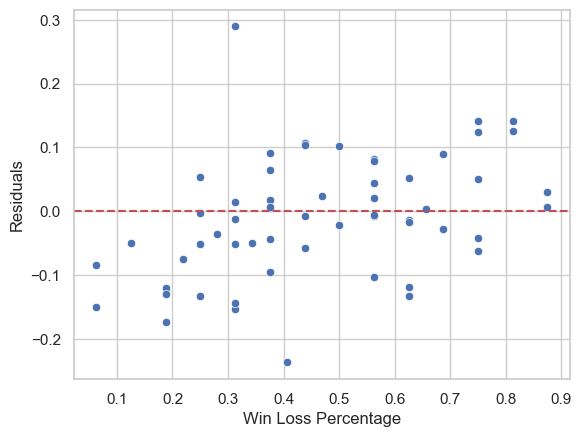

In [128]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Win Loss Percentage')
plt.ylabel('Residuals')

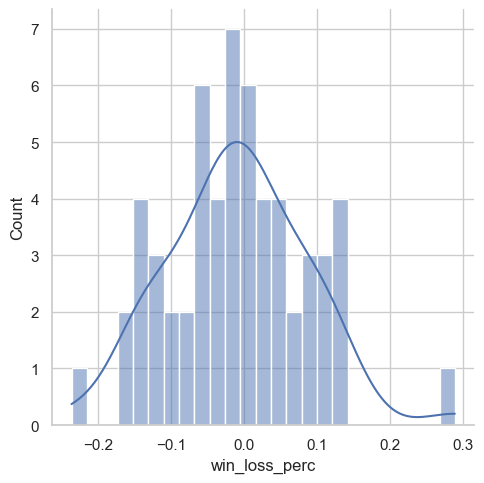

In [129]:
sns.displot(test_res,bins=25,kde=True)

In [130]:
import scipy as sp

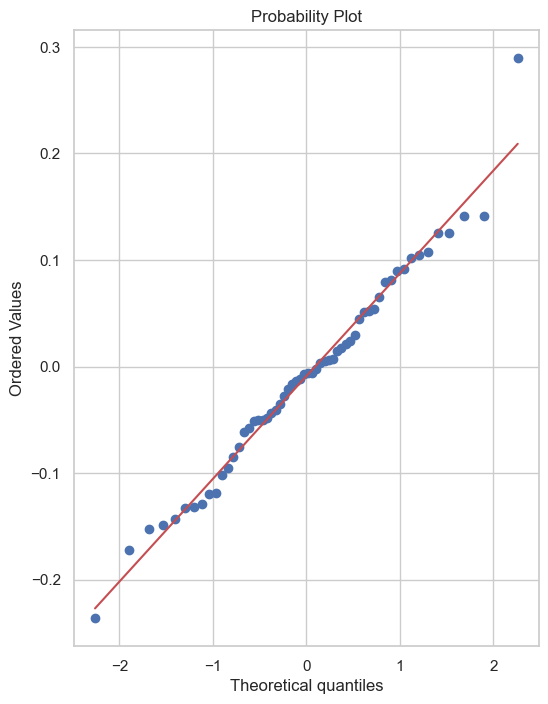

In [131]:
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_res,plot=ax)

Residuals appear normally distributed

In [132]:
model.coef_

array([ 2.39528888e-01,  2.25797643e-03, -5.78999383e-01,  2.17477295e-01,
       -1.37721098e-03,  6.99418999e-05,  1.28702410e-04,  2.02829464e-02,
       -7.27819253e-03,  1.20276962e-04])

In [133]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
cap_hit_sum,0.239529
cap_percent_sum,0.002258
cap_hit_gini_coef,-0.578999
avg_gini_coef_2_years,0.217477
points_opp,-0.001377
pass_yds,0.000070
rush_yds,0.000129
yds_per_play_offense,0.020283
turnovers,-0.007278
penalties,0.000120


In [134]:
means = df_nfl_combined_modeling_vars_wtarget[['cap_hit_sum','cap_percent_sum','cap_hit_gini_coef','avg_gini_coef_2_years','points_opp','pass_yds','rush_yds','yds_per_play_offense','turnovers','penalties']].mean()
means

cap_hit_sum                 0.722609
cap_percent_sum            68.924427
cap_hit_gini_coef           0.614549
avg_gini_coef_2_years       0.614165
points_opp                368.671875
pass_yds                 3793.437500
rush_yds                 1796.520833
yds_per_play_offense        5.479687
turnovers                  22.000000
penalties                 105.125000
dtype: float64

In [135]:
means = means.to_frame()
means.columns=['column1']
means

,column1
cap_hit_sum,0.722609
cap_percent_sum,68.924427
cap_hit_gini_coef,0.614549
avg_gini_coef_2_years,0.614165
points_opp,368.671875
pass_yds,3793.437500
rush_yds,1796.520833
yds_per_play_offense,5.479687
turnovers,22.000000
penalties,105.125000


In [136]:
coeff_df.shape

(10, 1)

In [137]:
means.shape

(10, 1)

In [138]:
product = np.multiply(means['column1'],coeff_df['Coefficient'])
product

cap_hit_sum              0.173086
cap_percent_sum          0.155630
cap_hit_gini_coef       -0.355824
avg_gini_coef_2_years    0.133567
points_opp              -0.507739
pass_yds                 0.265320
rush_yds                 0.231217
yds_per_play_offense     0.111144
turnovers               -0.160120
penalties                0.012644
dtype: float64

### Some variables close to 0 and some variables are redundant; Redo linear regression without cap_hit_sum, avg_gini_coef_2_years, yds_per_play_offense, and penalties

In [140]:
df_nfl_combined_modeling_vars_wtarget = df_nfl_combined_2014_2020[df_nfl_combined_2014_2020['season']>2014][['win_loss_perc','cap_percent_sum','cap_hit_gini_coef','points_opp','pass_yds','rush_yds','turnovers']]



X = df_nfl_combined_modeling_vars_wtarget.drop('win_loss_perc',axis=1)
y = df_nfl_combined_modeling_vars_wtarget['win_loss_perc']


# random_state:
# https://stackoverflow.com/questions/28064634/random-state-pseudo-random-number-in-scikit-learn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)



In [141]:
df_nfl_combined_modeling_vars_wtarget.shape

(192, 7)

In [142]:
X_train

,cap_percent_sum,cap_hit_gini_coef,points_opp,pass_yds,rush_yds,turnovers
182,67.82,0.604090,332,3141,2170,22
243,86.20,0.619009,323,3503,1850,17
433,75.88,0.559325,307,3836,1205,16
668,63.07,0.612625,329,3465,1611,27
498,66.16,0.657583,412,4047,1650,19
...,...,...,...,...,...,...
225,60.39,0.626419,360,3576,1660,19
247,83.16,0.631405,313,3733,1795,13
288,59.92,0.667567,344,4461,1718,24
38,82.25,0.607846,414,4363,1532,18


In [143]:
model = LinearRegression()

model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [144]:
# We only pass in test features
# The model predicts its own y hat
# We can then compare these results to the true y test label value
test_predictions = model.predict(X_test)

In [145]:
test_predictions

array([0.38604856, 0.38527624, 0.34157274, 0.30440473, 0.64884395,
       0.52850429, 0.14782598, 0.32385597, 0.58071677, 0.65589843,
       0.36976486, 0.73538311, 0.6502147 , 0.67311643, 0.53730372,
       0.37605169, 0.25428908, 0.65630857, 0.81570858, 0.32576476,
       0.33340273, 0.71304686, 0.61297142, 0.4600845 , 0.30222153,
       0.52370034, 0.84667201, 0.61775672, 0.49615722, 0.60675957,
       0.41915809, 0.36126395, 0.45996977, 0.46448863, 0.88458387,
       0.30452086, 0.18126137, 0.50148749, 0.33089082, 0.46097122,
       0.28934313, 0.30421943, 0.38662723, 0.77427916, 0.45465333,
       0.20965275, 0.35468269, 0.56510491, 0.19384388, 0.78309437,
       0.30105825, 0.69519441, 0.03514544, 0.64426371, 0.48896509,
       0.57461283, 0.2938672 , 0.64221437])

In [146]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

RMSE

np.float64(0.0948182565346206)

In [147]:
MSE

0.008990501772265121

In [148]:
MAE

0.0744816548565848

In [149]:
df_nfl_combined_modeling_vars_wtarget['win_loss_perc'].mean()

np.float64(0.5002604166666665)

In [150]:
# If our model was perfect, these would all be zeros
test_res = y_test - test_predictions
test_res

180   -0.136049
562    0.114724
307   -0.153573
118   -0.116405
395   -0.023844
121   -0.028504
311   -0.084826
143   -0.042856
540   -0.017717
583    0.157102
97     0.005235
79    -0.110383
139   -0.244215
477    0.139884
223    0.025696
584   -0.001052
499   -0.004289
601   -0.000309
457   -0.065709
414    0.112235
54    -0.020403
327   -0.025047
328    0.137029
119   -0.147085
141    0.072778
202    0.039300
454    0.028328
330    0.132243
541    0.066843
476    0.081240
411   -0.044158
518   -0.048264
537   -0.021970
350   -0.089489
58    -0.009584
287   -0.054521
521   -0.056261
390   -0.063487
665    0.107109
623   -0.147971
227    0.023657
159   -0.116219
16    -0.042627
57    -0.149279
13     0.014347
160   -0.146653
581    0.020317
416    0.059895
519    0.056156
138   -0.033094
226   -0.082058
120    0.054806
415    0.277855
646   -0.081264
622    0.074035
394   -0.011613
185    0.081133
558   -0.017214
Name: win_loss_perc, dtype: float64

Text(0.5, 1.0, 'ML Linear Regression Residuals')

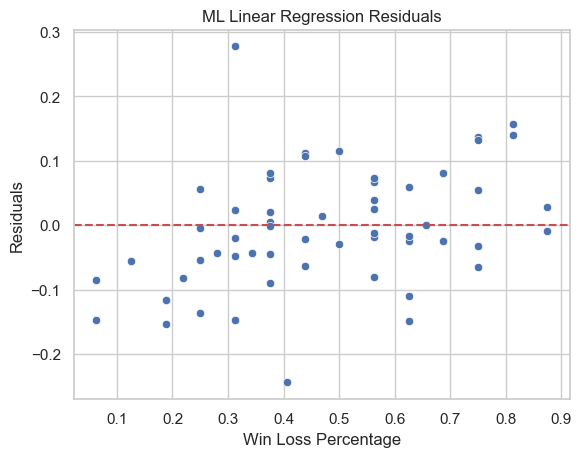

In [161]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Win Loss Percentage')
plt.ylabel('Residuals')
plt.title('ML Linear Regression Residuals')

Text(0.5, 1.0, 'Distribution Plot of Win Loss Percent Test Residuals')

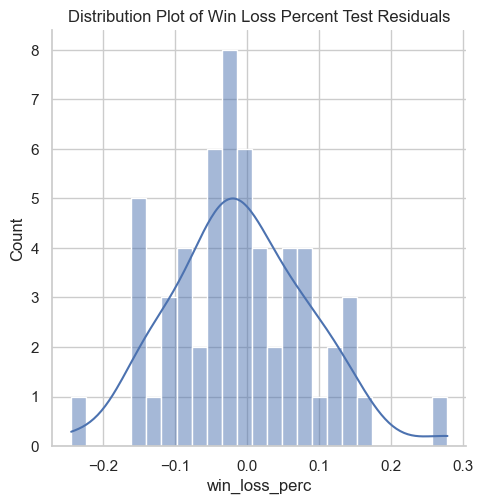

In [163]:
sns.displot(test_res,bins=25,kde=True)
plt.title('Distribution Plot of Win Loss Percent Test Residuals')

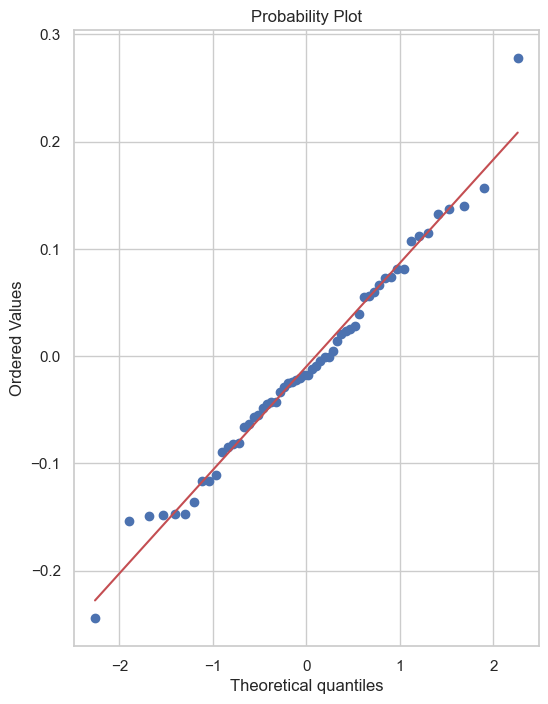

In [164]:
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_res,plot=ax)

Residuals appear normally distributed

In [165]:
model.coef_

array([ 4.54917138e-03, -4.36589967e-01, -1.34569311e-03,  8.64280786e-05,
        1.51470900e-04, -7.20250945e-03])

In [166]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
cap_percent_sum,0.004549
cap_hit_gini_coef,-0.436590
points_opp,-0.001346
pass_yds,0.000086
rush_yds,0.000151
turnovers,-0.007203


In [156]:
means = df_nfl_combined_modeling_vars_wtarget[['cap_percent_sum','cap_hit_gini_coef','points_opp','pass_yds','rush_yds','turnovers']].mean()
means

cap_percent_sum        68.924427
cap_hit_gini_coef       0.614549
points_opp            368.671875
pass_yds             3793.437500
rush_yds             1796.520833
turnovers              22.000000
dtype: float64

In [157]:
means = means.to_frame()
means.columns=['column1']
means

,column1
cap_percent_sum,68.924427
cap_hit_gini_coef,0.614549
points_opp,368.671875
pass_yds,3793.437500
rush_yds,1796.520833
turnovers,22.000000


In [158]:
coeff_df.shape

(6, 1)

In [159]:
means.shape

(6, 1)

In [160]:
product = np.multiply(means['column1'],coeff_df['Coefficient'])
product

cap_percent_sum      0.313549
cap_hit_gini_coef   -0.268306
points_opp          -0.496119
pass_yds             0.327860
rush_yds             0.272121
turnovers           -0.158455
dtype: float64

## Model looks good, but residuals not quite evenly distributed
## Perform polynomial regression

In [167]:
from sklearn.preprocessing import PolynomialFeatures

In [168]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [169]:
df_nfl_combined_modeling_vars_wtarget = df_nfl_combined_2014_2020[df_nfl_combined_2014_2020['season']>2014][['win_loss_perc','cap_percent_sum','cap_hit_gini_coef','points_opp','pass_yds','rush_yds','turnovers']]



X = df_nfl_combined_modeling_vars_wtarget.drop('win_loss_perc',axis=1)
y = df_nfl_combined_modeling_vars_wtarget['win_loss_perc']


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
poly_features = polynomial_converter.fit_transform(X)


In [170]:
df_nfl_combined_modeling_vars_wtarget.shape

(192, 7)

In [171]:
poly_features.shape

(192, 27)

In [172]:
X.shape

(192, 6)

In [173]:
X.iloc[0]

cap_percent_sum        82.120000
cap_hit_gini_coef       0.643391
points_opp            313.000000
pass_yds             4616.000000
rush_yds             1917.000000
turnovers              24.000000
Name: 12, dtype: float64

In [174]:
poly_features[0]

array([8.21200000e+01, 6.43390507e-01, 3.13000000e+02, 4.61600000e+03,
       1.91700000e+03, 2.40000000e+01, 6.74369440e+03, 5.28352284e+01,
       2.57035600e+04, 3.79065920e+05, 1.57424040e+05, 1.97088000e+03,
       4.13951344e-01, 2.01381229e+02, 2.96989058e+03, 1.23337960e+03,
       1.54413722e+01, 9.79690000e+04, 1.44480800e+06, 6.00021000e+05,
       7.51200000e+03, 2.13074560e+07, 8.84887200e+06, 1.10784000e+05,
       3.67488900e+06, 4.60080000e+04, 5.76000000e+02])

In [175]:
poly_features[0][:6]**2

array([6.74369440e+03, 4.13951344e-01, 9.79690000e+04, 2.13074560e+07,
       3.67488900e+06, 5.76000000e+02])

In [176]:
poly_features[0][:6]*68.32

array([5.61043840e+03, 4.39564394e+01, 2.13841600e+04, 3.15365120e+05,
       1.30969440e+05, 1.63968000e+03])

In [177]:
print(poly_features[0][:6]*0.59403)
print(poly_features[0][:6]*315)


[4.87817436e+01 3.82193263e-01 1.85931390e+02 2.74204248e+03
 1.13875551e+03 1.42567200e+01]
[2.5867800e+04 2.0266801e+02 9.8595000e+04 1.4540400e+06 6.0385500e+05
 7.5600000e+03]


poly_features[0] follows pattern of x1, x2, x3, x4, x5, x6, x1x1, x1x2, x1x3, x1x4, x1x5, x1x6, x2x2, x2x3, x2x4, x2x5, x2x6, x3x3, x3x4, x3x5, x3x6,...

In [178]:
from sklearn.model_selection import train_test_split

In [179]:
# random_state:
# https://stackoverflow.com/questions/28064634/random-state-pseudo-random-number-in-scikit-learn
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [180]:
model = LinearRegression(fit_intercept=True)

In [181]:
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False



-----

## Evaluation on the Test Set

In [182]:
test_predictions = model.predict(X_test)

In [183]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [184]:
print(MAE)
print(MSE)
print(RMSE)

0.08906486996092741
0.013588470276935445
0.11656959413558686


MAE, MSE, RMSE all worse than simple linear regression model

In [185]:
df_nfl_combined_modeling_vars_wtarget['win_loss_perc'].mean()

np.float64(0.5002604166666665)

In [186]:
X_train

array([[6.78200000e+01, 6.04089697e-01, 3.32000000e+02, ...,
        4.70890000e+06, 4.77400000e+04, 4.84000000e+02],
       [8.62000000e+01, 6.19009282e-01, 3.23000000e+02, ...,
        3.42250000e+06, 3.14500000e+04, 2.89000000e+02],
       [7.58800000e+01, 5.59324892e-01, 3.07000000e+02, ...,
        1.45202500e+06, 1.92800000e+04, 2.56000000e+02],
       ...,
       [5.99200000e+01, 6.67566694e-01, 3.44000000e+02, ...,
        2.95152400e+06, 4.12320000e+04, 5.76000000e+02],
       [8.22500000e+01, 6.07846206e-01, 4.14000000e+02, ...,
        2.34702400e+06, 2.75760000e+04, 3.24000000e+02],
       [8.27100000e+01, 6.46272436e-01, 3.62000000e+02, ...,
        3.23640100e+06, 2.87840000e+04, 2.56000000e+02]], shape=(134, 27))

In [187]:
test_predictions

array([ 0.3980802 ,  0.50392137,  0.35022734,  0.26768653,  0.55874904,
        0.58910995,  0.07272169,  0.28026028,  0.5979407 ,  0.56592365,
        0.39034496,  0.69124414,  0.66821901,  0.70169636,  0.5137012 ,
        0.30709234,  0.26749838,  0.6610535 ,  0.8204661 ,  0.25175232,
        0.31584699,  0.70506243,  0.62335953,  0.5121335 ,  0.18921378,
        0.54624652,  0.83831577,  0.68708968,  0.48653956,  0.54861454,
        0.41149408,  0.38599101,  0.52187599,  0.4871071 ,  0.74154852,
        0.29114266,  0.10862509,  0.52152238,  0.30293926,  0.46585735,
        0.01121969,  0.30267994,  0.36378008,  0.74328396,  0.34889814,
        0.19755381,  0.30207946,  0.57624171,  0.21157957,  0.80029559,
        0.30703701,  0.70675117, -0.02840141,  0.64469851,  0.51400174,
        0.5696199 ,  0.2658529 ,  0.62715673])

In [188]:
# If our model was perfect, these would all be zeros
test_res = y_test - test_predictions
test_res

180   -0.148080
562   -0.003921
307   -0.162227
118   -0.079687
395    0.066251
121   -0.089110
311   -0.009722
143    0.000740
540   -0.034941
583    0.247076
97    -0.015345
79    -0.066244
139   -0.262219
477    0.111304
223    0.049299
584    0.067908
499   -0.017498
601   -0.005053
457   -0.070466
414    0.186248
54    -0.002847
327   -0.017062
328    0.126640
119   -0.199134
141    0.185786
202    0.016753
454    0.036684
330    0.062910
541    0.076460
476    0.139385
411   -0.036494
518   -0.072991
537   -0.083876
350   -0.112107
58     0.133451
287   -0.041143
521    0.016375
390   -0.083522
665    0.135061
623   -0.152857
227    0.301780
159   -0.114680
16    -0.019780
57    -0.118284
13     0.120102
160   -0.134554
581    0.072921
416    0.048758
519    0.038420
138   -0.050296
226   -0.088037
120    0.043249
415    0.341401
646   -0.081699
622    0.048998
394   -0.006620
185    0.109147
558   -0.002157
Name: win_loss_perc, dtype: float64

Text(0.5, 1.0, 'Polynomial Regression Residuals')

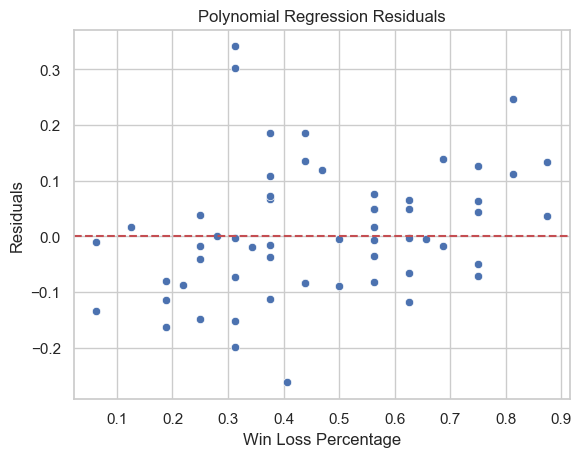

In [190]:
sns.scatterplot(x=y_test,y=test_res)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Win Loss Percentage')
plt.ylabel('Residuals')
plt.title('Polynomial Regression Residuals')

Text(0.5, 1.0, 'Polynomial Regression Residual Distribution')

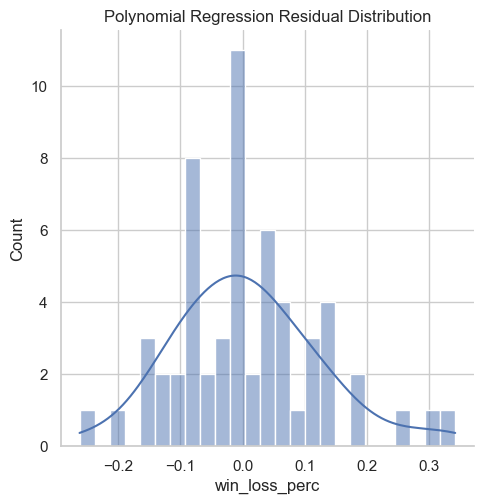

In [192]:
sns.displot(test_res,bins=25,kde=True)
plt.title('Polynomial Regression Residual Distribution')

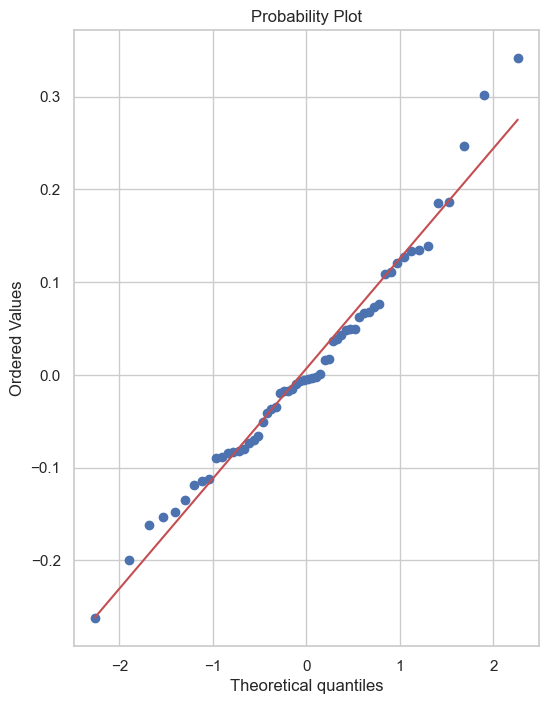

In [193]:
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_res,plot=ax)

Residuals appear normally distributed

In [194]:
model.coef_

array([-4.82865684e-03,  1.28058538e+01, -8.61303972e-03, -1.47945903e-05,
       -4.75749646e-04,  2.26391018e-02, -2.12931691e-05, -1.37065551e-02,
       -2.15103806e-05,  2.66994687e-06,  6.73914110e-06,  3.00731234e-04,
       -8.18509158e+00,  4.33074489e-03, -3.21879384e-04, -8.51629161e-04,
       -5.31782509e-02, -5.79233688e-06,  9.13630719e-07,  2.64293584e-06,
        9.18123548e-05, -4.73314898e-09, -1.24320647e-08, -7.35171311e-06,
       -1.24842100e-08, -8.04297413e-06, -1.75557268e-04])

# Residuals are not evenly distributed and results are worse than with linear regression model; use linear regression model

### Start of Linear Regression with Prior Year Data

In [152]:
df_nfl_combined_2014_2020.columns


Index(['team_x', 'season', 'cap_hit_gini_coef', 'avg_gini_coef_2_years',
       'cap_hit_sum', 'cap_percent_sum', 'team_name_2', 'year', 'team_y',
       'wins', 'losses', 'win_loss_perc', 'points', 'points_opp',
       'points_diff', 'mov', 'g', 'total_yards', 'plays_offense',
       'yds_per_play_offense', 'turnovers', 'fumbles_lost', 'first_down',
       'pass_cmp', 'pass_att', 'pass_yds', 'pass_td', 'pass_int',
       'pass_net_yds_per_att', 'pass_fd', 'rush_att', 'rush_yds', 'rush_td',
       'rush_yds_per_att', 'rush_fd', 'penalties', 'penalties_yds', 'pen_fd',
       'score_pct', 'turnover_pct', 'exp_pts_tot', 'ties', 'points_opp_y1',
       'pass_yds_y1', 'rush_yds_y1', 'turnovers_y1', 'points_opp_y2',
       'pass_yds_y2', 'rush_yds_y2', 'turnovers_y2'],
      dtype='object')

In [153]:
import statsmodels.api as sm

In [154]:
# Avg of 2 years of gini coefficient

wlp2=df_nfl_combined_2014_2020[df_nfl_combined_2014_2020['season']>2014][['win_loss_perc']]

x = sm.add_constant(df_nfl_combined_2014_2020[df_nfl_combined_2014_2020['season']>2014][['avg_gini_coef_2_years']])
model3 = sm.OLS(wlp2,x).fit()
print(model3.summary())


                            OLS Regression Results                            
Dep. Variable:          win_loss_perc   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     15.45
Date:                Sat, 10 Jan 2026   Prob (F-statistic):           0.000119
Time:                        13:33:44   Log-Likelihood:                 49.087
No. Observations:                 192   AIC:                            -94.17
Df Residuals:                     190   BIC:                            -87.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.48

In [155]:
# x = sm.add_constant(df_nfl_combined_2014_2020[['cap_hit_sum']])
x = sm.add_constant(df_nfl_combined_2014_2020[['cap_percent_sum']])
model5 = sm.OLS(wlp,x).fit()
print(model5.summary())


                            OLS Regression Results                            
Dep. Variable:          win_loss_perc   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     135.3
Date:                Sat, 10 Jan 2026   Prob (F-statistic):           9.80e-25
Time:                        13:35:27   Log-Likelihood:                 101.75
No. Observations:                 224   AIC:                            -199.5
Df Residuals:                     222   BIC:                            -192.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.2109      0.062     

In [163]:
x = sm.add_constant(df_nfl_combined_2014_2020[df_nfl_combined_2014_2020['season']>2014][['avg_gini_coef_2_years','cap_hit_gini_coef','cap_percent_sum']])

mult_model = sm.OLS(wlp2,x).fit()
print(mult_model.summary())

                            OLS Regression Results                            
Dep. Variable:          win_loss_perc   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     57.14
Date:                Sat, 10 Jan 2026   Prob (F-statistic):           2.66e-26
Time:                        13:44:01   Log-Likelihood:                 103.80
No. Observations:                 192   AIC:                            -199.6
Df Residuals:                     188   BIC:                            -186.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.26

In [165]:
x = sm.add_constant(df_nfl_combined_2014_2020[df_nfl_combined_2014_2020['season']>2014][['cap_hit_gini_coef','cap_percent_sum']])

mult_model = sm.OLS(wlp2,x).fit()
print(mult_model.summary())

                            OLS Regression Results                            
Dep. Variable:          win_loss_perc   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     86.14
Date:                Sat, 10 Jan 2026   Prob (F-statistic):           2.56e-27
Time:                        13:44:53   Log-Likelihood:                 103.78
No. Observations:                 192   AIC:                            -201.6
Df Residuals:                     189   BIC:                            -191.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2484      0.17

In [157]:
#  Multiple linear regression with avg 2 year gini coefficient and sum of cap hit



# Using cap_percent_sum results in greater R^2 and lower p-value for cap_hit_gini_coef
# Cap_percent_sum must be more accurate because cap space can vary between teams

# Using avg_gini_coef_2_years results in lower p-value for gini coef component and no improvement in R^2/F-Statistic


# x = sm.add_constant(df_nfl_combined_2014_2020[df_nfl_combined_2014_2020['season']>2014][['cap_hit_gini_coef','cap_hit_sum']])
# x = sm.add_constant(df_nfl_combined_2014_2020[df_nfl_combined_2014_2020['season']>2014][['cap_hit_gini_coef','cap_percent_sum']])
x = sm.add_constant(df_nfl_combined_2014_2020[df_nfl_combined_2014_2020['season']>2014][['avg_gini_coef_2_years','cap_hit_gini_coef','cap_percent_sum','points_opp_y1','pass_yds_y1', 'rush_yds_y1', 'turnovers_y1', 'points_opp_y2','pass_yds_y2', 'rush_yds_y2', 'turnovers_y2']])

mult_model = sm.OLS(wlp2,x).fit()
print(mult_model.summary())

                            OLS Regression Results                            
Dep. Variable:          win_loss_perc   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     17.88
Date:                Sat, 10 Jan 2026   Prob (F-statistic):           1.05e-23
Time:                        13:38:42   Log-Likelihood:                 112.47
No. Observations:                 192   AIC:                            -200.9
Df Residuals:                     180   BIC:                            -161.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.14

In [192]:
x = sm.add_constant(df_nfl_combined_2014_2020[df_nfl_combined_2014_2020['season']>2014][['cap_hit_gini_coef','cap_percent_sum','turnovers_y1','rush_yds_y2']])

mult_model = sm.OLS(wlp2,x).fit()
print(mult_model.summary())

                            OLS Regression Results                            
Dep. Variable:          win_loss_perc   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     48.82
Date:                Sat, 10 Jan 2026   Prob (F-statistic):           4.51e-28
Time:                        14:44:39   Log-Likelihood:                 110.22
No. Observations:                 192   AIC:                            -210.4
Df Residuals:                     187   BIC:                            -194.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2554      0.19

In [195]:
x = sm.add_constant(df_nfl_combined_2014_2020[['cap_hit_gini_coef','cap_percent_sum','points_opp_y1','turnovers_y1']])

mult_model = sm.OLS(wlp,x).fit()
print(mult_model.summary())

                            OLS Regression Results                            
Dep. Variable:          win_loss_perc   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     46.10
Date:                Sun, 11 Jan 2026   Prob (F-statistic):           4.55e-28
Time:                        17:13:15   Log-Likelihood:                 116.86
No. Observations:                 224   AIC:                            -223.7
Df Residuals:                     219   BIC:                            -206.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.5765      0.18

2014-2020 data: Defense and turnovers on offense key stats

after using 2015-2020 data (2014-2020 data produced better results)

Rushing yards from two seasons prior is significant, perhaps because rushing is more fundamental to offensive success than other factors.  If a team has a good rushing game, they probably have a good offensive line.  A good offensive line may be an important precursor to quarterback and passing game development.  If the run game isn't strong, other teams will focus more on stopping the passing attack.  It may take a team multiple years to develop a good passing attack, and they may not be able to if the quarterback doesn't have protection from his offensive line.

It may be a random element in the data that rush yards from two years prior are more import than rush yards from the past season, but it may indicate an offensive line is strong and a team can build the offense with their support.

Run regression on all years without financial data.

In [174]:
wlp_team_stats = df_nfl_combined[df_nfl_combined['season']>2004][['win_loss_perc']]

In [175]:
x = sm.add_constant(df_nfl_combined[df_nfl_combined['season']>2004][['points_opp_y1','pass_yds_y1', 'rush_yds_y1', 'turnovers_y1', 'points_opp_y2','pass_yds_y2', 'rush_yds_y2', 'turnovers_y2']])

mult_model_team_stats = sm.OLS(wlp_team_stats,x).fit()
print(mult_model_team_stats.summary())

                            OLS Regression Results                            
Dep. Variable:          win_loss_perc   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     6.418
Date:                Sat, 10 Jan 2026   Prob (F-statistic):           1.77e-07
Time:                        14:15:47   Log-Likelihood:                 72.422
No. Observations:                 224   AIC:                            -126.8
Df Residuals:                     215   BIC:                            -96.14
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1612      0.209      0.771

In [180]:
x = sm.add_constant(df_nfl_combined[df_nfl_combined['season']>2004][['points_opp_y1','pass_yds_y1', 'rush_yds_y1']])
# 'pass_yds_y2','turnovers_y1',

mult_model_team_stats = sm.OLS(wlp_team_stats,x).fit()
print(mult_model_team_stats.summary())

                            OLS Regression Results                            
Dep. Variable:          win_loss_perc   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     14.02
Date:                Sat, 10 Jan 2026   Prob (F-statistic):           2.13e-08
Time:                        14:18:36   Log-Likelihood:                 68.037
No. Observations:                 224   AIC:                            -128.1
Df Residuals:                     220   BIC:                            -114.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3143      0.157      2.003

In [193]:
x = sm.add_constant(df_nfl_combined[df_nfl_combined['season']>2004][['points_opp_y1','pass_yds_y1','pass_yds_y2','turnovers_y1', 'rush_yds_y1','rush_yds_y2']])
# 'pass_yds_y2','turnovers_y1',

mult_model_team_stats = sm.OLS(wlp_team_stats,x).fit()
print(mult_model_team_stats.summary())

                            OLS Regression Results                            
Dep. Variable:          win_loss_perc   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     8.426
Date:                Sat, 10 Jan 2026   Prob (F-statistic):           3.16e-08
Time:                        14:44:52   Log-Likelihood:                 71.895
No. Observations:                 224   AIC:                            -129.8
Df Residuals:                     217   BIC:                            -105.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1180      0.191      0.618

In [190]:
# After finding these non-financial variables significant using 2005-2023 data


x = sm.add_constant(df_nfl_combined_2014_2020[df_nfl_combined_2014_2020['season']>2014][['cap_hit_gini_coef','cap_percent_sum','points_opp_y1','pass_yds_y1','pass_yds_y2','turnovers_y1', 'rush_yds_y1','rush_yds_y2']])

mult_model = sm.OLS(wlp2,x).fit()

# x = sm.add_constant(df_nfl_combined_2014_2020[df_nfl_combined_2014_2020['season']>2014][['avg_gini_coef_2_years','cap_percent_sum','points_opp_y1','pass_yds_y1','pass_yds_y2','turnovers_y1', 'rush_yds_y1','rush_yds_y2']])
#
# mult_model = sm.OLS(wlp2,x).fit()

#
# x = sm.add_constant(df_nfl_combined_2014_2020[['cap_hit_gini_coef','cap_percent_sum','points_opp_y1','pass_yds_y1','pass_yds_y2','turnovers_y1', 'rush_yds_y1','rush_yds_y2']])
#
# mult_model = sm.OLS(wlp,x).fit()


print(mult_model.summary())



                            OLS Regression Results                            
Dep. Variable:          win_loss_perc   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     24.77
Date:                Sat, 10 Jan 2026   Prob (F-statistic):           1.38e-25
Time:                        14:41:06   Log-Likelihood:                 112.02
No. Observations:                 192   AIC:                            -206.0
Df Residuals:                     183   BIC:                            -176.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1872      0.24

Results of both models (with and without 2014 data) garbage - pass yards and rush yards from prior season both less statistically significant than pass and rush yards from two seasons ago

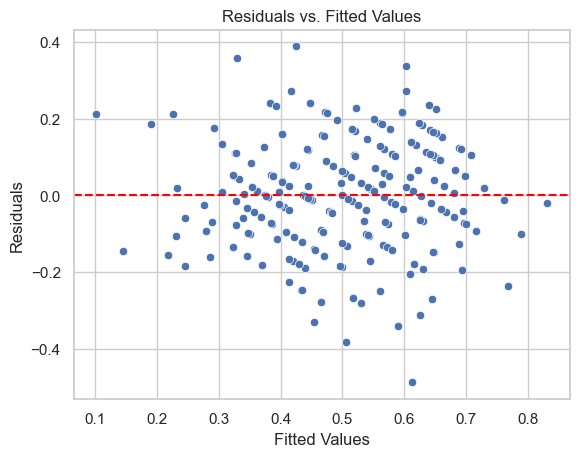

In [196]:
# Extract residuals and fitted values
residuals = mult_model.resid
fitted_values = mult_model.fittedvalues

# Create the plot
sns_plot1 = sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs. Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

# plt.savefig("WLP_Resid_Fitted_Vals_avg_gini_cap_perc_sum_2015_2020.png",dpi=300)


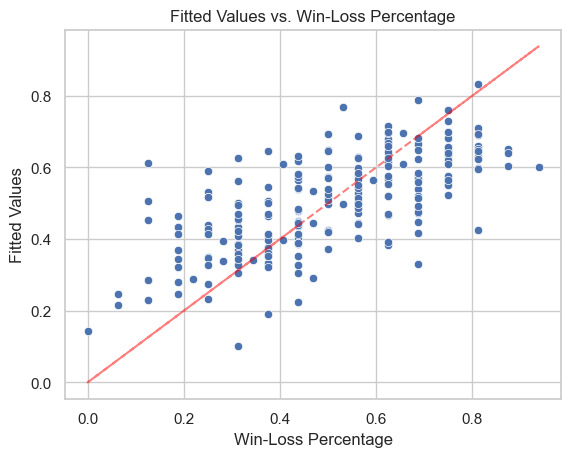

In [199]:
# Create the plot
wlp_1d = wlp['win_loss_perc'].to_numpy()
wlp_1d.shape


sns.scatterplot(x=wlp_1d, y=fitted_values)
# ,alpha=.5
plt.plot(wlp_1d,wlp_1d, color='red',linestyle='--',alpha=0.5)
plt.title("Fitted Values vs. Win-Loss Percentage")
plt.xlabel("Win-Loss Percentage")
plt.ylabel("Fitted Values")
plt.show()

# plt.savefig("WLP_avg_gini_cap_perc_sum_vs_Fitted_2015_2020.png",dpi=300)


Residuals more dispersed than full model; more data above line at lower end and below line at higher end - model is predicting closer to avg values

In [57]:
pd.reset_option('display.max_rows',None)

In [66]:
wlp2_1d = wlp2['win_loss_perc'].to_numpy()
wlp2_1d.shape


(192,)

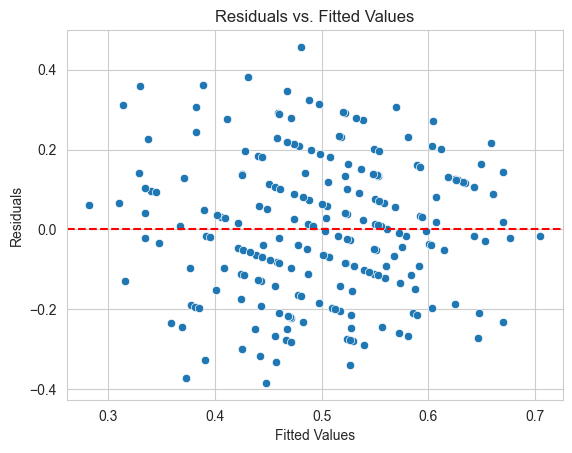

In [215]:
# Extract residuals and fitted values
residuals = mult_model_team_stats.resid
fitted_values = mult_model_team_stats.fittedvalues

# Create the plot
sns_plot1 = sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs. Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

# plt.savefig("WLP_Resid_Fitted_Vals_2015_2020.png",dpi=300)



In [216]:
fitted_values.shape

(224,)

In [217]:
wlp_team_stats_1d = wlp_team_stats['win_loss_perc'].to_numpy()
wlp_team_stats_1d.shape

(224,)

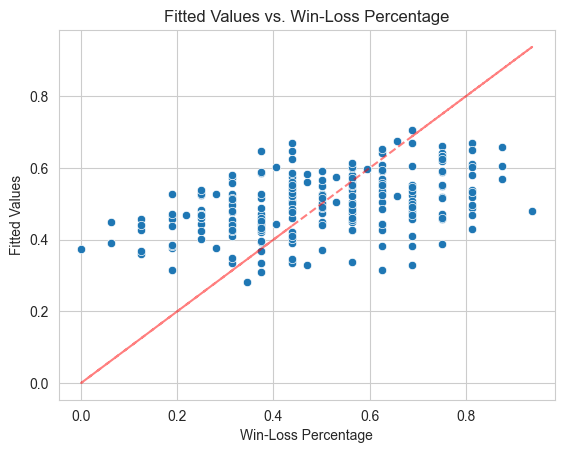

In [219]:
# Create the plot
sns.scatterplot(x=wlp_team_stats_1d, y=fitted_values)
plt.plot(wlp_team_stats_1d,wlp_team_stats_1d, color='red',linestyle='--',alpha=0.5)
plt.title("Fitted Values vs. Win-Loss Percentage")
plt.xlabel("Win-Loss Percentage")
plt.ylabel("Fitted Values")
plt.show()

# plt.savefig("WLP_vs_Fitted_Vals_2015_2020.png",dpi=300)

